# Price Prediction

Dataset from amazon ecommerce platform is used. This dataset is available at https://data.world/promptcloud/fashion-products-on-amazon-com


## A. Importing Modules and Dataset

In [1]:
# The Python modules uses in this tutorial are:

# - Pandas
# - Numpy
# - Matplotlib
# - Seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
from wordcloud import WordCloud
from tqdm import tqdm,tqdm_notebook
import math
import scipy
import scipy.sparse
import time
import datetime

# Text Libs..
import re
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')
from nltk.stem import WordNetLemmatizer, SnowballStemmer,PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import *
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import plot_model
from IPython.display import Image
from contextlib import contextmanager

# ML Libs...
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.layers import Dense, Input , Dropout, Flatten,concatenate,LSTM
import keras as ks
from keras.models import load_model
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint,TensorBoard,ReduceLROnPlateau, EarlyStopping




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
Using TensorFlow backend.


Loading of data set

In [2]:

df = pd.read_csv('../datasets/amazon_co-ecommerce_sample.csv')

# You can also open loans_train.csv with Excel and take a look at it.

## B. Quick Data Exploration

Once the dataset is loaded into a dataframe, we can have a look at the first and the last few data rows with the dataframe methods `head()` and `tail()`, respectively.

In [3]:
# Print first 5 rows of the dataframe
df.head(5)

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN


In [4]:
# Print last 5 rows of the dataframe
df.tail(5)

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
9995,44d6967f083825a5de36ad4865a65bcd,Batman 1966 TV Series Action Figures - The Rid...,Mattel,£22.95,5 new,3,3.0,5.0 out of 5 stars,Hobbies > Collectible Figures & Memorabilia > ...,http://www.amazon.co.uk/Batman-1966-Series-Act...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,Technical Details Item Weight136 g Product Dim...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,NaN,NaN,Realistic // 5.0 // 31 Mar. 2014 // By\n \n...,"{""seller""=>[{""Seller_name_1""=>""Star Action Fig..."
9996,08f0747b6fc6687215ffb994c3a6fb32,"Star Wars Costume, Kids Stormtrooper Costume S...",Star Wars,£39.99,NaN,1,3.0,4.0 out of 5 stars,Characters & Brands > Star Wars > Toys,http://www.amazon.co.uk/Storm-Trooper-Costume-...,NaN,Technical Details Additional Information AS...,NaN,http://www.amazon.co.uk/Storm-Trooper-Costume-...,NaN,... what I see my grandson us going to have fu...,NaN
9997,bf6cc073f8f24e6e338190fa16f6ee9d,Defiance Lawkeeper Metal Badge Prop Replica,Olde Scotland Yard Ltd.,£43.99,3 new,1,3.0,5.0 out of 5 stars,Novelty & Special Use > Novelty > Accessories ...,NaN,*Includes 1x Badge with holder and chain *High...,Technical Details Item Weight159 g Product Dim...,*Includes 1x Badge with holder and chain *High...,http://www.amazon.co.uk/Olde-Scotland-Yard-Ltd...,NaN,Five Stars // 5.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>[{""Seller_name_1""=>""YUK"", ""Seller_p..."
9998,cd783d0b8b44e631b9788b203eaaefae,Justice League of America Series 3 Green Lante...,DC Comics,£49.81,3 new,1,3.0,5.0 out of 5 stars,Hobbies > Collectible Figures & Memorabilia > ...,NaN,Designed by Ed BenesIt's here - the third seri...,Technical Details Item Weight181 g Product Dim...,Designed by Ed BenesIt's here - the third seri...,NaN,NaN,The best sculpt in a while // 5.0 // 13 May 20...,"{""seller""=>[{""Seller_name_1""=>""Smaller World F..."
9999,94d18e86e504bee1e392df7e5738b18a,Star Wars 1/72 Y-Wing Starfighter,Bandai,£21.20,31 new,11,3.0,4.5 out of 5 stars,Characters & Brands > Star Wars > Toys,http://www.amazon.co.uk/Bandai-Star-Wars-Fight...,NaN,Technical Details Item Weight299 g Product Dim...,NaN,NaN,NaN,Gold leader // 5.0 // 31 Aug. 2015 // By\n ...,NaN


In [5]:
df.shape

(10000, 17)

In [6]:
# data types of the individual variables within the dataframe
df.dtypes

uniq_id                                         object
product_name                                    object
manufacturer                                    object
price                                           object
number_available_in_stock                       object
number_of_reviews                               object
number_of_answered_questions                   float64
average_review_rating                           object
amazon_category_and_sub_category                object
customers_who_bought_this_item_also_bought      object
description                                     object
product_information                             object
product_description                             object
items_customers_buy_after_viewing_this_item     object
customer_questions_and_answers                  object
customer_reviews                                object
sellers                                         object
dtype: object

Need to drop the follwoing columns : uniq_id, number_available_in_stock, number_of_reviews, number_of_answered_questions, customers_who_bought_this_item_also_bought, items_customers_buy_after_viewing_this_item, customer_questions_and_answers, customer_reviews.


In [7]:
df = df.drop(['uniq_id','number_available_in_stock','number_of_reviews', 'number_of_answered_questions','customers_who_bought_this_item_also_bought','items_customers_buy_after_viewing_this_item','customer_questions_and_answers', 'customer_reviews'],axis =1)

# Update the price column by removing the currency sign and change to numerical type
df['price'] = df['price'].str.replace("£","")

prices = df['price'].str.split("-",n=1,expand = True)

df['price'] = prices[0]

df['price'] = df['price'].str.replace(",","")


df['price'] = pd.to_numeric(df['price'],downcast="float")

In [8]:
print('Missing values Count in Price = ',df.price.isnull().sum())
df.price.describe().apply(lambda x: format(x, 'f'))


Missing values Count in Price =  1435


count    8565.000000
mean       20.278004
std        46.345566
min         0.010000
25%         4.990000
50%        10.620000
75%        19.990000
max      2439.919922
Name: price, dtype: object

#### spliting amazon_category_and_sub_category column to category and subcategory column

In [9]:
categories =  df['amazon_category_and_sub_category'].str.split(">",n=1,expand = True)
df['category'] = categories[0]
df['subcategory'] = categories[1]
df.drop(columns = ['amazon_category_and_sub_category'],inplace = True)

In [10]:
df.category.describe()

count         9310
unique          43
top       Hobbies 
freq          1464
Name: category, dtype: object

### product_description and description columns having same values, dropping the product_description column

In [11]:
# Print statistical summary for all numerical attributes
df.product_description.describe()

count                                                  9349
unique                                                 8514
top       Welcome to k2, we offer combined items postage...
freq                                                    113
Name: product_description, dtype: object

In [12]:
df.description.describe()

count                                                  9349
unique                                                 8514
top       Welcome to k2, we offer combined items postage...
freq                                                    113
Name: description, dtype: object

In [13]:
df.drop(columns = ['product_description'],inplace = True)

### Seller column details

In [14]:

df['sellers'].value_counts()

{"seller"=>{"Seller_name_1"=>"k2-accessories", "Seller_price_1"=>"£0.99"}}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             27
{"seller"=>{"Seller_name_1"=>"k2-accessories", "Seller_price_1"=>"£0.90"}}                                                                    

seller is collection of multiple sellers for each item. I will drop this field from dataset.

In [15]:
df.drop(columns = ['sellers'],inplace = True)

In [16]:
df


,product_name,manufacturer,price,average_review_rating,description,product_information,category,subcategory
0,Hornby 2014 Catalogue,Hornby,3.420000,4.9 out of 5 stars,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Hobbies,Model Trains & Railway Sets > Rail Vehicles >...
1,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,16.990000,4.5 out of 5 stars,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Hobbies,Model Trains & Railway Sets > Rail Vehicles >...
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,9.990000,3.9 out of 5 stars,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,Hobbies,Model Trains & Railway Sets > Rail Vehicles >...
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,39.990002,5.0 out of 5 stars,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hobbies,Model Trains & Railway Sets > Rail Vehicles >...
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,32.189999,4.7 out of 5 stars,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Hobbies,Model Trains & Railway Sets > Rail Vehicles >...
5,20pcs Model Garden Light Double Heads Lamppost...,Generic,6.990000,5.0 out of 5 stars,These delicate model garden lights are mainly ...,Technical Details Manufacturer recommended age...,Hobbies,Model Trains & Railway Sets > Lighting & Sign...
6,Hornby 00 Gauge 230mm BR Bogie Passenger Brake...,Hornby,24.990000,4.5 out of 5 stars,Product Description Hornby BR bogie passenger ...,Technical Details Item Weight222 g Product Dim...,Hobbies,Model Trains & Railway Sets > Rail Vehicles >...
7,Hornby Santa's Express Train Set,Hornby,69.930000,4.3 out of 5 stars,Product Description Inject a bit of Hornby mag...,Technical Details Item Weight1.2 Kg Product Di...,Hobbies,Model Trains & Railway Sets > Rail Vehicles >...
8,Hornby Gauge Western Express Digital Train Set...,Hornby,235.580002,5.0 out of 5 stars,Western Express Digital Train Set with eLink a...,Technical Details Item Weight2.3 Kg Product Di...,Hobbies,Model Trains & Railway Sets > Rail Vehicles >...
9,Learning Curve Chuggington Interactive Chatsworth,Chuggington,NaN,4.8 out of 5 stars,Product Description An amazingly Interactive C...,Technical Details Item Weight150 g Product Dim...,Hobbies,Model Trains & Railway Sets > Rail Vehicles >...


In [17]:
df['description'].value_counts()

Welcome to k2, we offer combined items postage, UK combined items postage discount: £1.00 P&H for combined items under £10.00, £2.00 - £3.50 P&H for combined items between £10 to £50, Free P&H for the shipment, when combined items order over £50.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [18]:
df['product_information'].value_counts()

Technical Details Item Weight680 g Product Dimensions39.4 x 8.3 x 28.6 cm Manufacturer recommended age:3 years and up Item model number97051 Assembly RequiredNo Batteries Required?No Batteries Included?No    Additional Information ASINB00VPY5NQG Best Sellers Rank 88,160 in Toys & Games (See top 100) #68 in Toys & Games > Advent Calendars Shipping Weight721 g Delivery Destinations:Visit the Delivery Destinations Help page to see where this item can be delivered. Date First Available13 Aug. 2015    Feedback  Would you like to update product info or give feedback on images?                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [19]:

df.isnull().sum()

product_name                0
manufacturer                7
price                    1435
average_review_rating      18
description               651
product_information        58
category                  690
subcategory               690
dtype: int64

In [20]:


df=df.apply(lambda x: x.fillna(x.value_counts().index[0]))

df = df[df.price < 35]
df.shape
df.isnull().sum()

product_name             0
manufacturer             0
price                    0
average_review_rating    0
description              0
product_information      0
category                 0
subcategory              0
dtype: int64

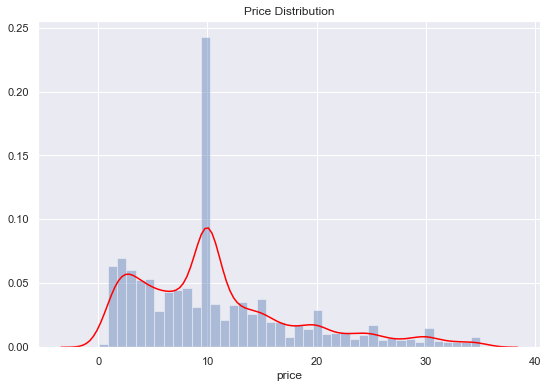

In [21]:
sns.set(rc={'figure.figsize':(9,6)})
sns.distplot(df.price, kde_kws = {"color" : "red"})
plt.title('Price Distribution')
plt.show()

In [22]:
'''This Function below Generates Percentiles of a Numeric Distribution'''

def generate_percentiles(data,col,start,end,step,method):
    x = PrettyTable()
    x.field_names = ["Percentile", str(col)]

    percentiles = []
    out = []
    lst = range(start,end,step) if method == 'range' else np.linspace(start,end,step)
    for i in lst:
        x.add_row([i,np.round(np.percentile(data,i), 3)])
        percentiles.append(i)
        out.append(np.round(np.percentile(data,i), 3))
    print(x)
    plt.plot(percentiles,out)
    plt.title(str(col) + ' Percentiles = ' + str(start)+"-"+str(end-1)) if method == 'range' else plt.title(str(col) + ' Percentiles = ' + str(start)+"-"+str(end))
        
    plt.show()

+------------+-------+
| Percentile | PRICE |
+------------+-------+
|     0      |  0.01 |
|     5      |  1.62 |
|     10     |  2.27 |
|     15     |  2.99 |
|     20     |  3.99 |
|     25     |  4.99 |
|     30     | 6.066 |
|     35     |  7.44 |
|     40     | 8.694 |
|     45     |  9.99 |
|     50     |  9.99 |
|     55     |  9.99 |
|     60     |  9.99 |
|     65     | 10.99 |
|     70     | 12.48 |
|     75     |  14.0 |
|     80     | 15.97 |
|     85     | 18.99 |
|     90     | 21.99 |
|     95     |  27.0 |
|    100     | 34.99 |
+------------+-------+


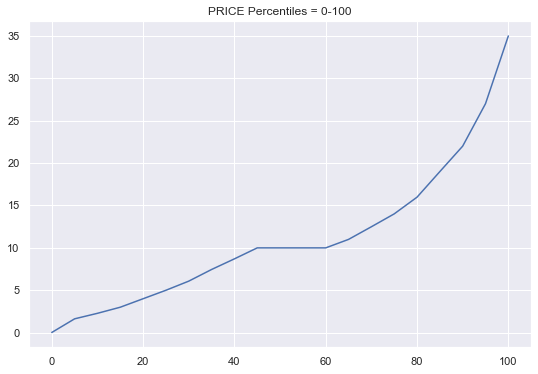

In [23]:
generate_percentiles(df['price'],'PRICE',0,101,5,'range')

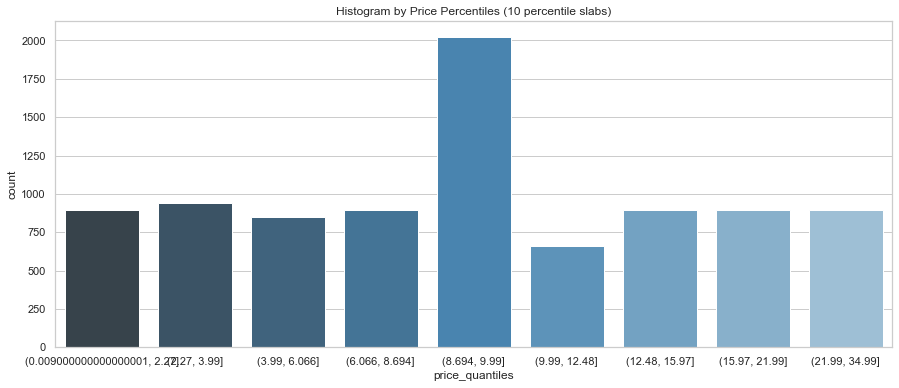

In [24]:
# ref - https://stackoverflow.com/questions/56148987/plot-a-histogram-based-on-percentiles
''' This code creates 10 percentile buckets for the price column '''

df['price_quantiles'] = pd.qcut(df['price'], q=np.arange(0,1.1,0.1),duplicates='drop')
tmp_df = pd.DataFrame(df.groupby('price_quantiles').agg('size').reset_index())
tmp_df.columns = ['price_quantiles','count']

sns.set(rc={'figure.figsize':(15,6)}, style = 'whitegrid')
sns.barplot(x="price_quantiles", y="count", data= tmp_df,palette="Blues_d")
plt.title('Histogram by Price Percentiles (10 percentile slabs)')
plt.show()

Norma price 0     3.42
1    16.99
Name: price, dtype: float32
Log price 0    1.486140
1    2.889816
Name: log_price, dtype: float32


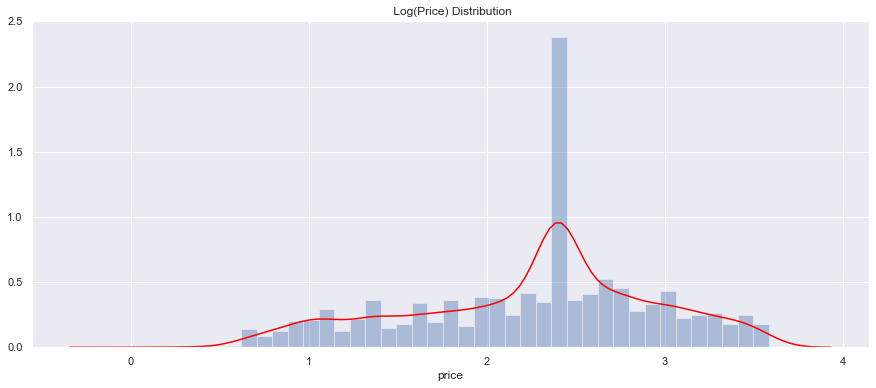

In [25]:
'''This code transforms the price into Log Distribution -> log(1+price) '''

df['log_price'] = np.log1p(df['price'])
print('Norma price',df['price'][:2])
print('Log price',df['log_price'][:2])
sns.set(rc={'figure.figsize':(15,6)})
sns.distplot(np.log1p(df.price), kde_kws = {"color" : "red"})
plt.title(' Log(Price) Distribution')
plt.show()

In [26]:
# Price variation across manufacturer
print('Check missing values in manufacturer Column = ',df.manufacturer.isnull().sum(), " which is ",
     round(df.manufacturer.isnull().sum()/len(df),4)*100," %",'\n')
print('Unique Number of manufacturer are = ',df.manufacturer.nunique())

Check missing values in manufacturer Column =  0  which is  0.0  % 

Unique Number of manufacturer are =  2478


In [27]:

#ref - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_index.html
# ref - https://stackoverflow.com/questions/20965046/cumulative-sum-and-percentage-on-column
#ref - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_index.html
'''This code groups the data by manufacturer Names'''

df_manufacturer = pd.DataFrame(df.groupby('manufacturer', as_index=False).agg({'price': 'mean','average_review_rating' : 'count'}))
df_manufacturer.columns = ['manufacturer_name','avg_price','count']
df_manufacturer = df_manufacturer.sort_values(by=['count'],ascending = False)
df_manufacturer['cumsum_count'] = df_manufacturer['count'].cumsum()
df_manufacturer['cumsum_perc'] = round(100*(df_manufacturer['cumsum_count']/df_manufacturer['count'].sum()),2)
df_manufacturer = df_manufacturer.reset_index()

print('df_manufacturer.shape  = ' , df_manufacturer.shape)
df_manufacturer.head(12)

df_manufacturer.shape  =  (2478, 6)


,index,manufacturer_name,avg_price,count,cumsum_count,cumsum_perc
0,1491,Oxford Diecast,10.874936,156,156,1.74
1,559,Disney,11.788636,154,310,3.46
2,1154,LEGO,13.449166,132,442,4.94
3,1595,Playmobil,13.197168,113,555,6.20
4,1898,Star Wars,14.305943,106,661,7.38
5,2062,The Puppet Company,13.395243,103,764,8.53
6,1294,Mattel,12.131764,102,866,9.67
7,1413,MyTinyWorld,3.083978,93,959,10.71
8,916,Hasbro,15.208965,87,1046,11.68
9,442,Corgi,14.926486,74,1120,12.51


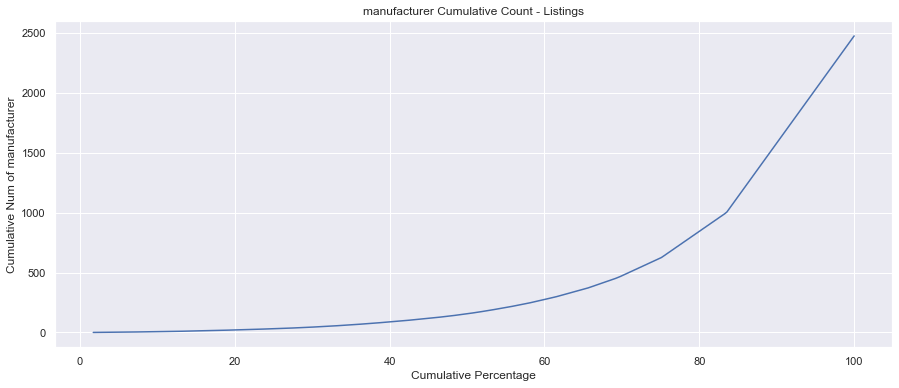

In [28]:
plt.plot(df_manufacturer.cumsum_perc,df_manufacturer.index)
plt.xlabel('Cumulative Percentage')
plt.ylabel('Cumulative Num of manufacturer')
plt.title('manufacturer Cumulative Count - Listings')
plt.show()

##### Plot summary - 83% of Product Listings are covered by top 1000 Manufacturers (by Count of Listings)

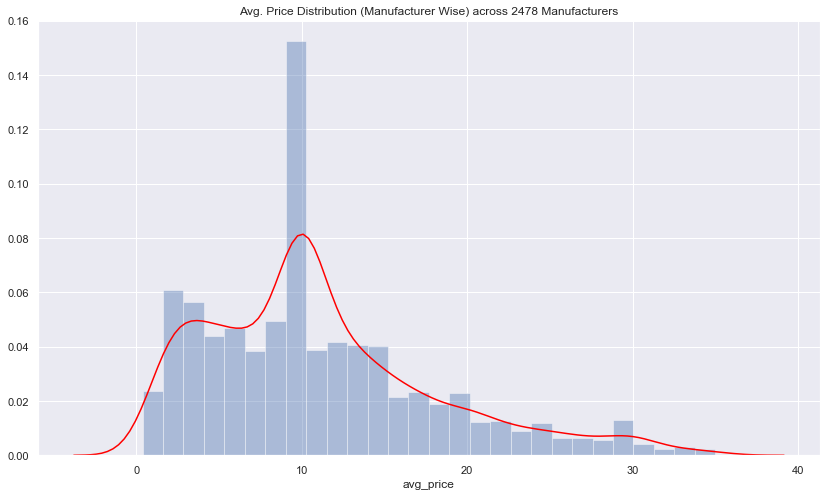

In [29]:
sns.set(rc={'figure.figsize':(14,8)})
sns.distplot(df_manufacturer.avg_price, kde_kws = {"color" : "red"})
plt.title('Avg. Price Distribution (Manufacturer Wise) across '+ str(len(df_manufacturer))+' Manufacturers')
plt.show()

##### Plot summary - Most Manufacturers have Avg Price Ranges in the Range of about = (10-100)

In [30]:
print('Check missing values in category Column = ',df.category.isnull().sum(), " which is ",
     round(df.category.isnull().sum()/len(df),4)*100," %",'\n')
print('Unique number of Elements in category are = ',df.category.nunique())
print('Elements in category are = ',df.category.unique())

Check missing values in category Column =  0  which is  0.0  % 

Unique number of Elements in category are =  43
Elements in category are =  ['Hobbies ' 'Characters & Brands ' 'Fancy Dress ' 'Bags ' 'Arts & Crafts '
 'Handbags & Shoulder Bags ' 'Games ' 'Figures & Playsets '
 'Home Accessories ' 'Sweets, Chocolate & Gum ' 'Sports Toys & Outdoor '
 'Die-Cast & Toy Vehicles ' 'Baby & Toddler Toys '
 'Storage, Cleaning & Ring Sizers ' 'Bedding & Linens ' 'Office Supplies '
 'Party Supplies ' 'Camping & Hiking ' 'Women ' 'Electronic Toys '
 'Car Parts ' 'Dolls & Accessories ' 'Indoor Lighting '
 'Laundry, Storage & Organisation ' "Supporters' Gear "
 'Jams, Honey & Spreads ' 'Novelty & Special Use '
 'Musical Toy Instruments ' 'Men ' 'Sex & Sensuality ' 'Cooking & Dining '
 'Medication & Remedies ' 'Puppets & Puppet Theatres '
 'Jigsaws & Puzzles ' 'Educational Toys ' 'Dogs '
 'Medical Supplies & Equipment ' 'Pens, Pencils & Writing Supplies '
 'Worlds Apart ' 'Gardening ' 'Lab & Scientifi

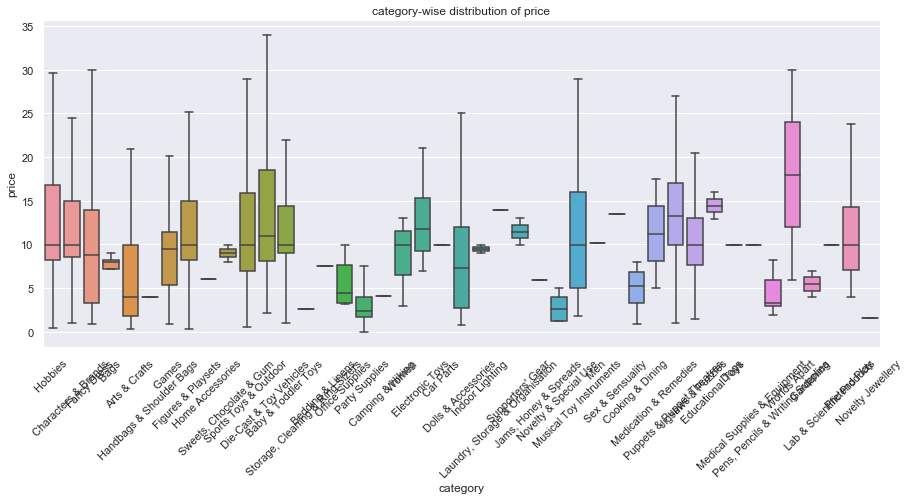

In [31]:
plt.figure(figsize=(15,6))
sns.boxplot(y='price', x='category', data=df, showfliers=False)
plt.xticks(rotation=45)
plt.title('category-wise distribution of price')
plt.show()

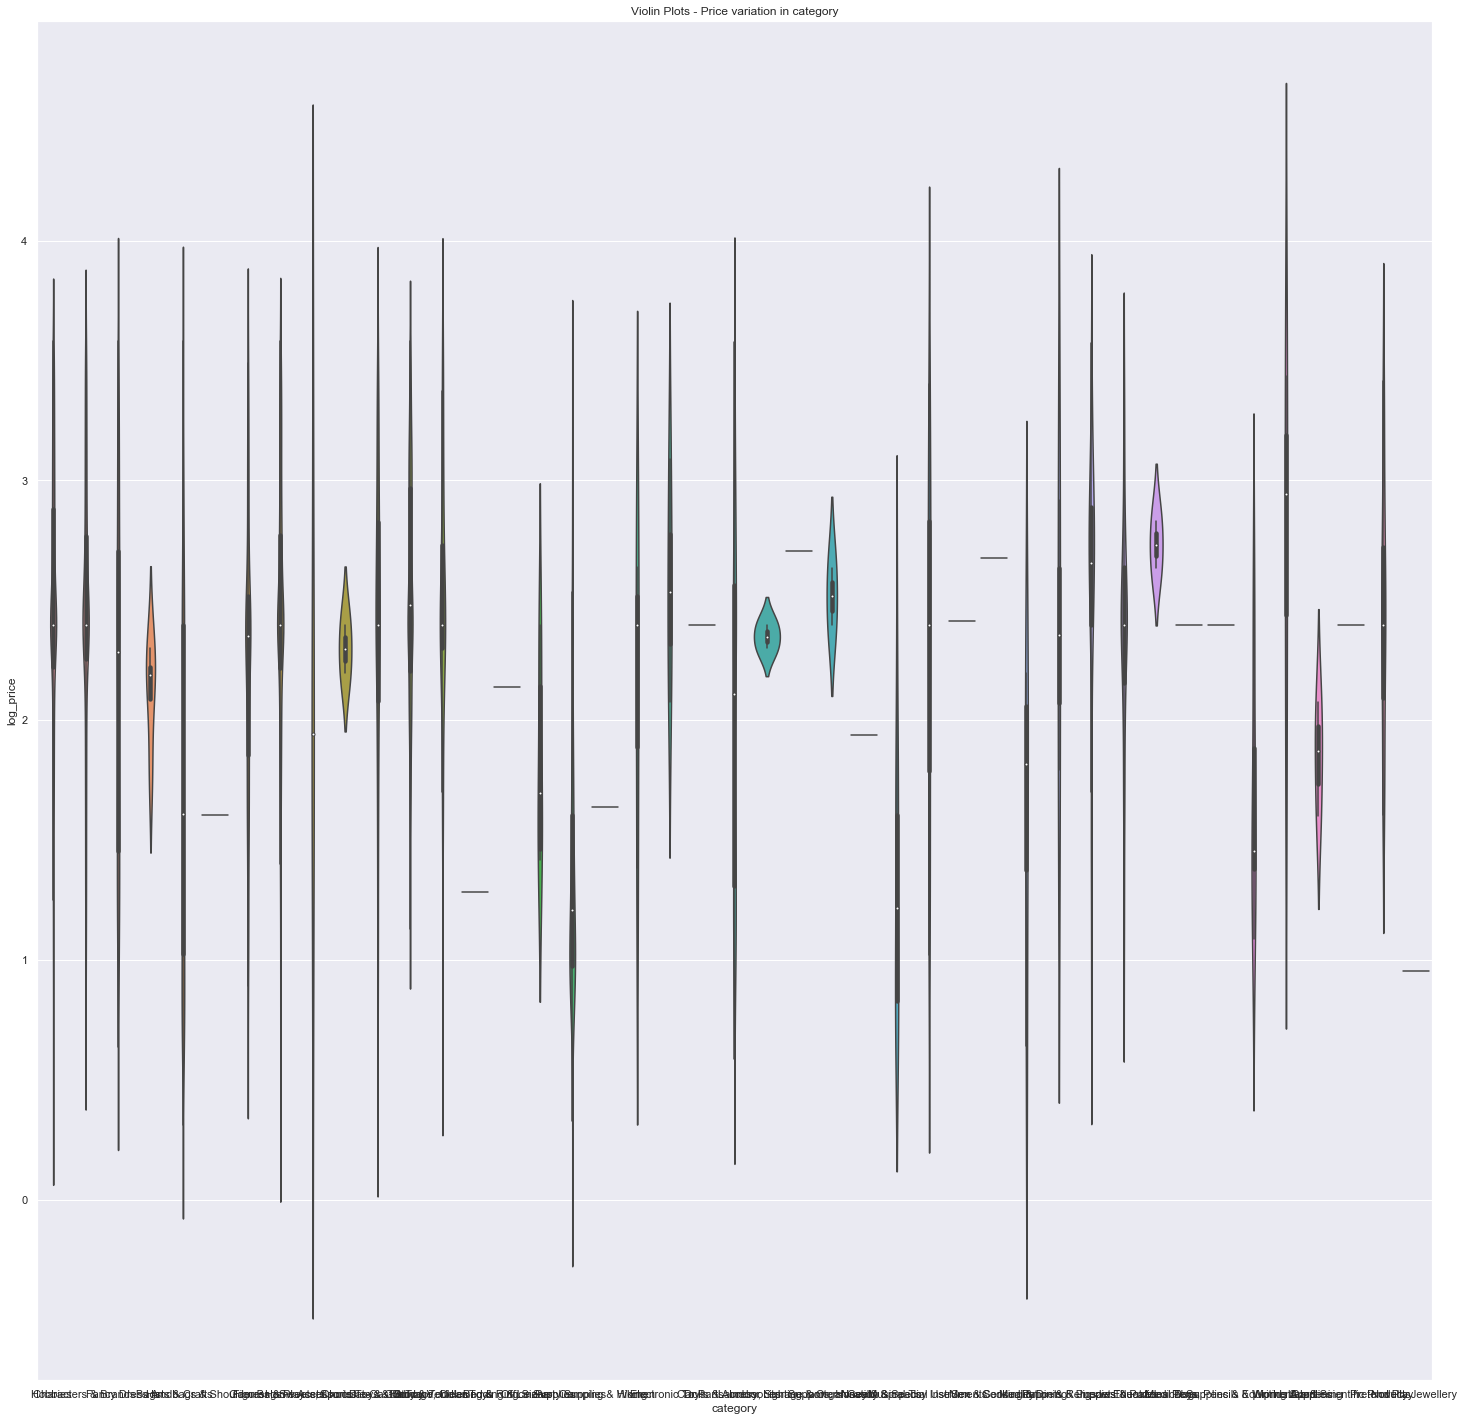

In [32]:
#ref - https://seaborn.pydata.org/generated/seaborn.violinplot.html
fig = plt.figure(figsize = (25,25))
ax = fig.gca()


sns.set(rc={'figure.figsize':(80,50)})
sns.violinplot(x="category", y="log_price", data = df,ax=ax)
plt.title('Violin Plots - Price variation in category')
plt.show()

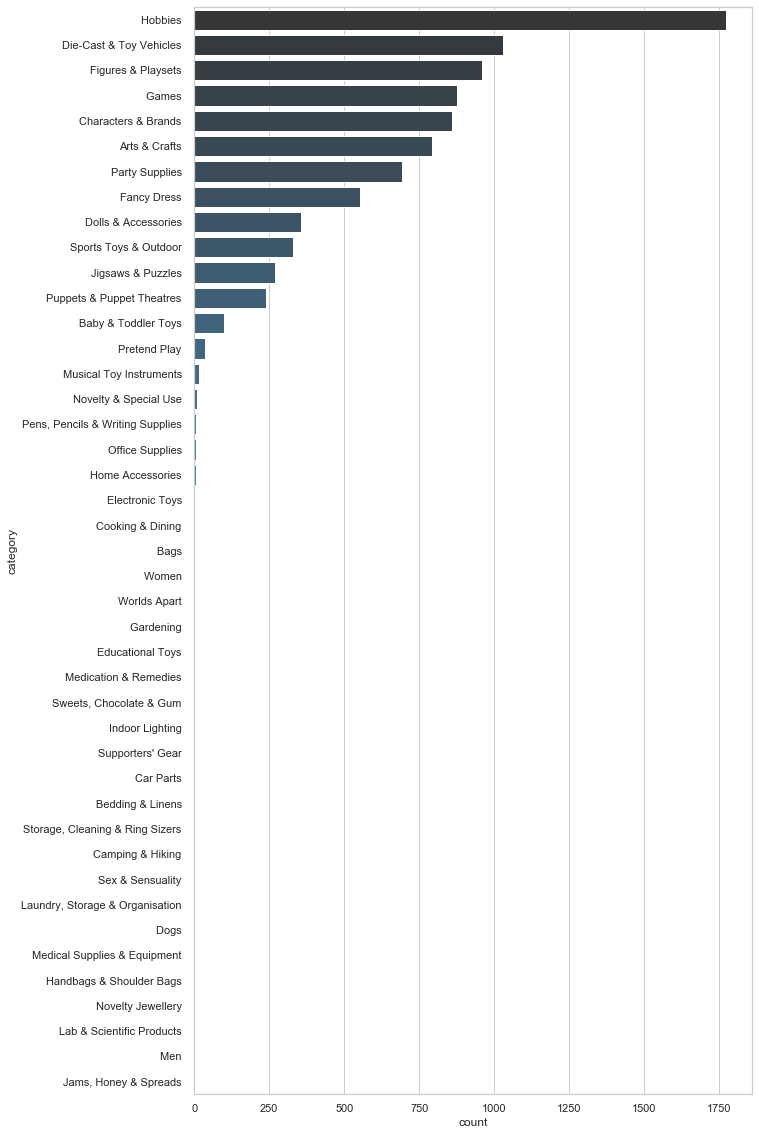

In [33]:
df_category_counts = pd.DataFrame(df.groupby('category',as_index = False).agg({'average_review_rating' : 'count'}))
df_category_counts.columns = ['category','count']
df_category_counts = df_category_counts.sort_values(by=['count'],ascending = False)

sns.set(rc={'figure.figsize':(10,20)}, style = 'whitegrid')
sns.barplot(x = "count", y="category", data=df_category_counts,palette="Blues_d")

##### Plot summary - Most of the Item Categories belong to 'Hobbies category' - Level 1

In [34]:
''' This code concatenates the category and subcategory texts'''
text_category = " ".join(cat for cat in df.category.values.astype(str))
text_subcategory = " ".join(cat for cat in df.subcategory.values.astype(str))

text_cat = text_category + text_subcategory
print ("There are {} words in the combination of all review.".format(len(text_cat)),'\n')

There are 437421 words in the combination of all review. 



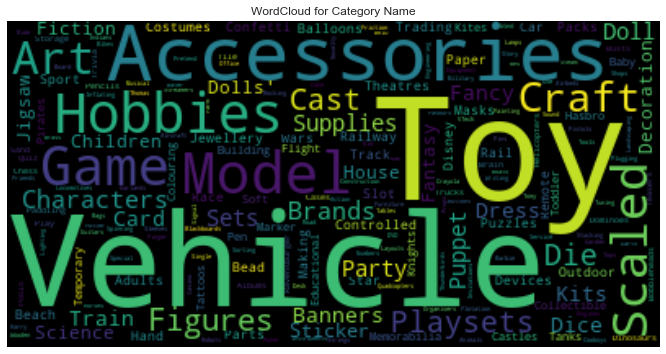

In [35]:
# Create and generate a word cloud image:
#ref - https://www.datacamp.com/community/tutorials/wordcloud-python
#ref - https://stackoverflow.com/questions/43954114/python-wordcloud-repetitve-words
#ref - https://www.geeksforgeeks.org/generating-word-cloud-python/
'''Code for generating wordclouds'''

wordcloud = WordCloud(collocations=False).generate(text_cat)

plt.figure(figsize = (12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('WordCloud for Category Name')
plt.show()

##### Plot summary - Most of the Words in the 'category' contain 'Toy, Hobbies, Train,Vehicle' - This is evident since most of the categories belong to Hobbies

### <font color='red'> EDA - Visualize 'Product Names' </font>

In [36]:
print('Missing values in listing "product_name" are ', df.product_name.isnull().sum())

Missing values in listing "product_name" are  0


In [37]:
# ref - www.appliedaicourse.com/
''' This code performs text processing by cleaning text including 
removing stopwords, reemoving special characters, performing, word decontraction etc. '''

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

def text_preprocess(data):
    preprocessed = []
    # tqdm is for printing the status bar
    for sentance in tqdm_notebook(data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\"', ' ')
        sent = sent.replace('\\n', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e not in stopwords)
        preprocessed.append(sent.lower().strip())
    return preprocessed

In [38]:
df['product_name_preprocessed'] = text_preprocess(df['product_name'])

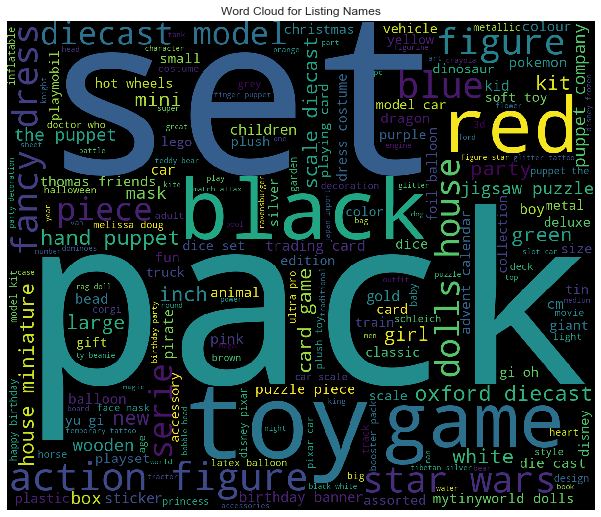

In [39]:
''' Generating Wordcloud for Item Name column'''
wordcloud = WordCloud(width = 1200, height = 1000).generate(" ".join(df.product_name_preprocessed.astype(str)))
plt.figure(figsize = (20, 9))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Word Cloud for Listing Names')
plt.show()

##### Plot Summary - Above are the most frequently occuring words in Item product_name column, We can see that item names contains lot of information related to category of the item

In [40]:
# ref - https://stackoverflow.com/questions/46786211/counting-the-frequency-of-words-in-a-pandas-data-frame
'''This code generates Word Frequency distribution dataframe'''

a = df['product_name_preprocessed'].str.lower().str.cat(sep = ' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)

df_names_freq_dist = pd.DataFrame(word_dist.most_common(),columns=['Word', 'Frequency'])
df_names_freq_dist = df_names_freq_dist.sort_values(by=['Frequency'],ascending = False)
df_names_freq_dist['cumsum_Frequency'] = df_names_freq_dist['Frequency'].cumsum()
df_names_freq_dist['cumsum_perc'] = round(100*(df_names_freq_dist['cumsum_Frequency']/df_names_freq_dist['Frequency'].sum()),2)
df_names_freq_dist = df_names_freq_dist.reset_index()
print(df_names_freq_dist.shape, ' df_names_freq_dist.shape ')
df_names_freq_dist.head(10)

(12542, 5)  df_names_freq_dist.shape 


,index,Word,Frequency,cumsum_Frequency,cumsum_perc
0,0,1,1027,1027,1.34
1,1,pack,646,1673,2.19
2,2,set,636,2309,3.02
3,3,the,537,2846,3.73
4,4,scale,489,3335,4.37
5,5,figure,468,3803,4.98
6,6,model,444,4247,5.56
7,7,x,437,4684,6.13
8,8,toy,425,5109,6.69
9,9,2,406,5515,7.22


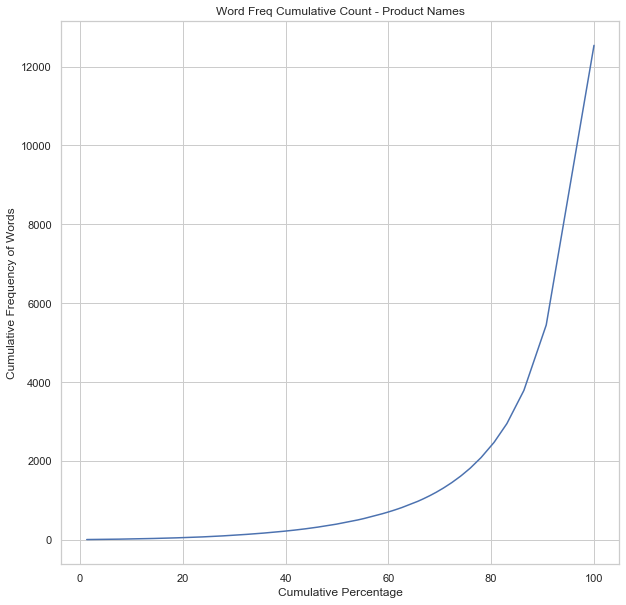

In [41]:
fig = plt.figure(figsize = (10,10))
#ax = fig.gca()
plt.plot(df_names_freq_dist.cumsum_perc,df_names_freq_dist.index)
plt.xlabel('Cumulative Percentage')
plt.ylabel('Cumulative Frequency of Words')
plt.title('Word Freq Cumulative Count - Product Names')
plt.show()

##### Plot Summary - As we can see above, Top 4000 words account for ~83% of total word vocabulary in the Entire Corpus.

In [42]:
#ref  - https://stackoverflow.com/questions/46786211/counting-the-frequency-of-words-in-a-pandas-data-frame

t = 95
df_sub = df_names_freq_dist[df_names_freq_dist['cumsum_perc'] < t]
print(len(df_sub)," words out of", len(df_names_freq_dist)," words", 
    " have Cumulative frequency < ",str(t)," and min word freq is ",min(df_sub.Frequency))

8718  words out of 12542  words  have Cumulative frequency <  95  and min word freq is  1


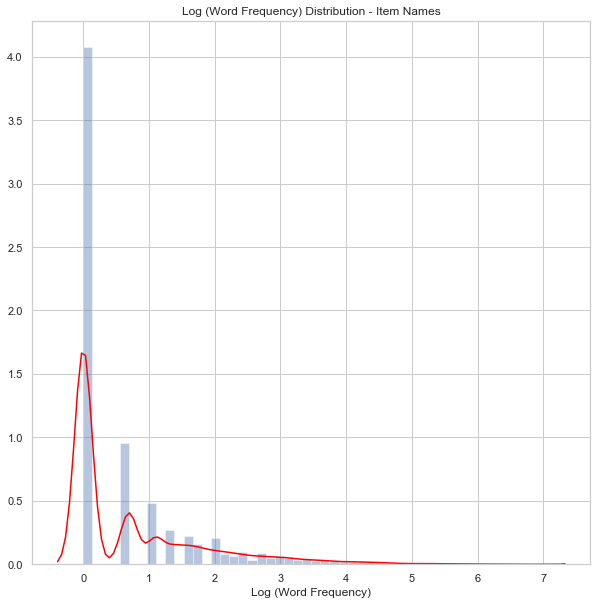

In [43]:
fig = plt.figure(figsize = (10,10))
#ax = fig.gca()
sns.distplot(np.log(df_names_freq_dist['Frequency']),kde = True, hist = True,kde_kws={"color": "red"})
plt.xlabel('Log (Word Frequency)')
plt.title('Log (Word Frequency) Distribution - Item Names')
plt.show()

##### Plot Summary - Most words have Log(word frequency) between 0-1

In [44]:
df_names_freq_dist['Frequency'].describe()

count    12542.000000
mean         6.090496
std         24.805822
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       1027.000000
Name: Frequency, dtype: float64

### <font color='red'> EDA - Visualize 'descriptions' </font>

In [45]:
print('Missing values in listing "Description" are ', df.description.isnull().sum())

Missing values in listing "Description" are  0


In [46]:
'''This code replaces missing values with an empty string'''

df['description'] = df['description'].replace([np.nan,'No description yet'], '')
print('Missing values in listing "Description" are ', df.description.isnull().sum())

Missing values in listing "Description" are  0


In [47]:
df['desc_preprocessed'] = text_preprocess(df['description'])

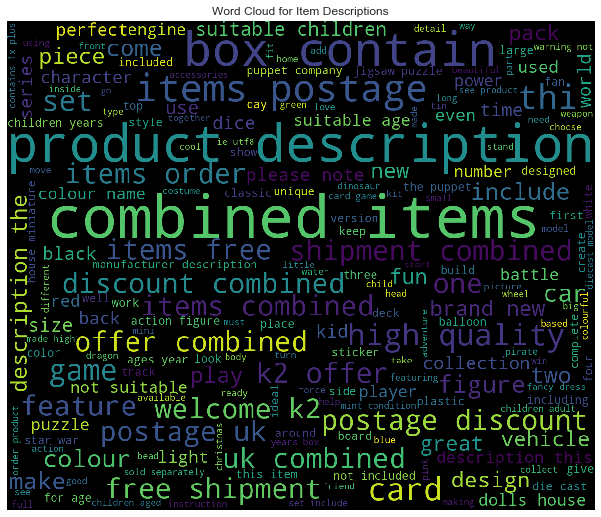

In [48]:
wordcloud = WordCloud(width = 1200, height = 1000).generate(" ".join(df.desc_preprocessed.astype(str)))
plt.figure(figsize = (20, 9))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Word Cloud for Item Descriptions')
plt.show()

##### Plot Summary - We can infer that most of these words are talking about the product which makes sense because this would heavily account for the product prices. 

In [49]:
a = df['desc_preprocessed'].str.lower().str.cat(sep = ' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)

df_names_freq_dist = pd.DataFrame(word_dist.most_common(),columns=['Word', 'Frequency'])
df_names_freq_dist = df_names_freq_dist.sort_values(by=['Frequency'],ascending = False)
df_names_freq_dist['cumsum_Frequency'] = df_names_freq_dist['Frequency'].cumsum()
df_names_freq_dist['cumsum_perc'] = round(100*(df_names_freq_dist['cumsum_Frequency']/df_names_freq_dist['Frequency'].sum()),2)
df_names_freq_dist = df_names_freq_dist.reset_index()
print(df_names_freq_dist.shape, ' df_names_freq_dist.shape ')
df_names_freq_dist.head(10)

(27958, 5)  df_names_freq_dist.shape 


,index,Word,Frequency,cumsum_Frequency,cumsum_perc
0,0,1,4986,4986,1.14
1,1,the,4504,9490,2.16
2,2,x,4484,13974,3.18
3,3,items,3927,17901,4.08
4,4,combined,3652,21553,4.91
5,5,product,3515,25068,5.71
6,6,description,3209,28277,6.44
7,7,box,3072,31349,7.14
8,8,contains,2807,34156,7.78
9,9,3,2748,36904,8.41


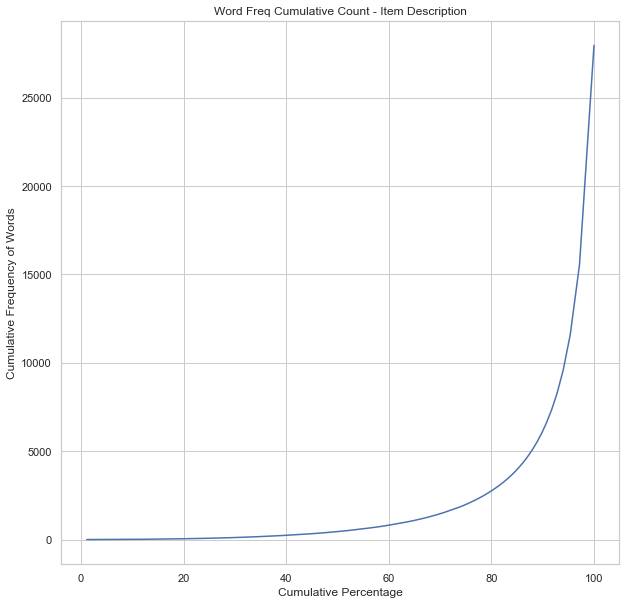

In [50]:
fig = plt.figure(figsize = (10,10))
#ax = fig.gca()

plt.plot(df_names_freq_dist.cumsum_perc,df_names_freq_dist.index)
plt.xlabel('Cumulative Percentage')
plt.ylabel('Cumulative Frequency of Words')
plt.title('Word Freq Cumulative Count - Item Description')
plt.show()

##### Plot Summary - Around top 15000 words have 98% word coverage in the corpus

In [51]:
#ref  - https://stackoverflow.com/questions/46786211/counting-the-frequency-of-words-in-a-pandas-data-frame

t = 98
df_sub = df_names_freq_dist[df_names_freq_dist['cumsum_perc'] < t]
print(len(df_sub)," words out of", len(df_names_freq_dist)," words", 
    " have Cumulative frequency < ",str(t)," and min word freq is ",min(df_sub.Frequency))

19158  words out of 27958  words  have Cumulative frequency <  98  and min word freq is  1


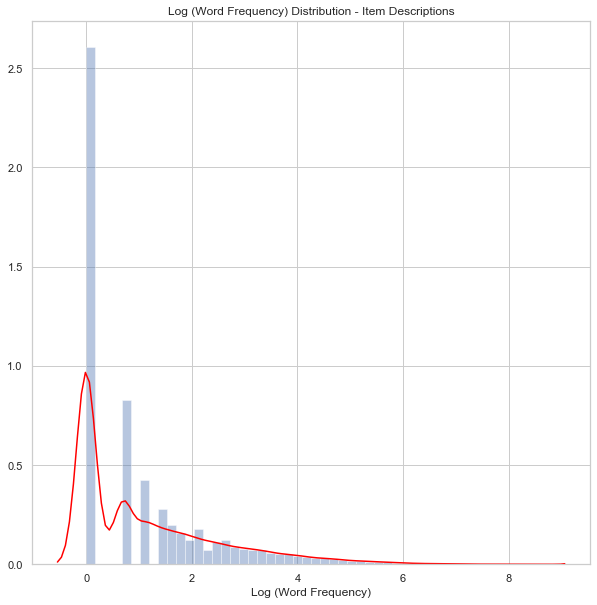

In [52]:
fig = plt.figure(figsize = (10,10))
#ax = fig.gca()

sns.distplot(np.log(df_names_freq_dist['Frequency']),kde = True, hist = True,kde_kws={"color": "red"})
plt.xlabel('Log (Word Frequency)')
plt.title('Log (Word Frequency) Distribution - Item Descriptions')
plt.show()

##### Plot summary - Most words have Log(Freq) < 2

In [53]:
df_names_freq_dist['Frequency'].describe()

count    27958.000000
mean        15.697332
std        100.045268
min          1.000000
25%          1.000000
50%          2.000000
75%          6.000000
max       4986.000000
Name: Frequency, dtype: float64

### <font color='red'> EDA - Visualize 'product_information' </font>

In [54]:
print('Missing values in listing "product_information" are ', df.product_information.isnull().sum())

Missing values in listing "product_information" are  0


In [55]:
'''This code replaces missing values with an empty string'''

df['product_information'] = df['product_information'].replace([np.nan,'No description yet'], '')
print('Missing values in listing "product_information" are ', df.description.isnull().sum())

Missing values in listing "product_information" are  0


In [56]:
df['product_information_preprocessed'] = text_preprocess(df['product_information'])

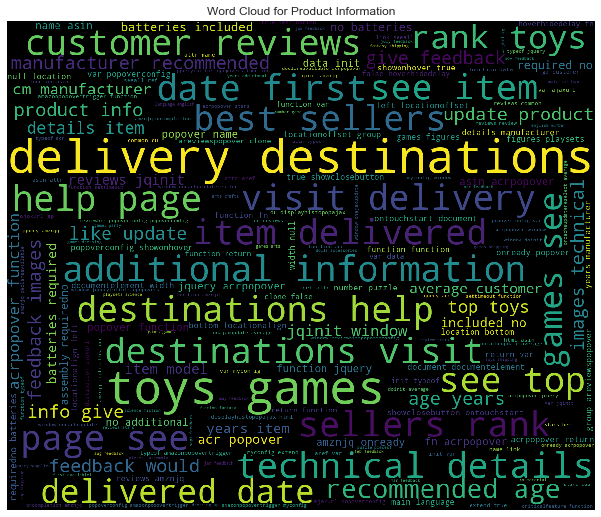

In [57]:
wordcloud = WordCloud(width = 1200, height = 1000).generate(" ".join(df.product_information_preprocessed.astype(str)))
plt.figure(figsize = (20, 9))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Word Cloud for Product Information')
plt.show()

#  <a id = 'section3'> <font color='red'>  3. Data Processing  </font> </a>

### <font color='red'> 3.1 Train Test Split </font>

In [58]:
df_train,df_test = train_test_split(df,test_size = 0.10)

In [59]:
print(df_train.shape,df_test.shape)

(8056, 13) (896, 13)


### <font color='red'> 3.2 Feature Transform - Text Data  </font>

In [60]:
'''This Function takes in Text sentences data and performs 
BOW/TF-IDF vectorizations based on parameters input including 
ngrams, min_df,max_features etc. '''

def text_encoder(train,test,vect_type,params):
    vectorizer = CountVectorizer(ngram_range = params[0],
                                 min_df = params[1],
                                 max_df = params[2],
                                 max_features = params[3]) if vect_type == 'BOW' else TfidfVectorizer(ngram_range = params[0],
                                                                                                      min_df = params[1],
                                                                                                      max_df = params[2],
                                                                                                      max_features = params[3])
    train_transform = vectorizer.fit_transform(train)
    test_transform = vectorizer.transform(test)
    feat_names = vectorizer.get_feature_names()
    return train_transform,test_transform,feat_names

In [61]:
# Input params = [ngram, min_df,max_df,max_features]

train_bow_product_name,test_bow_product_name,name_feats = text_encoder(df_train['product_name_preprocessed'],
                                                      df_test['product_name_preprocessed'],
                                                      'BOW',
                                                      ((1,4),25,1.0,50000))

train_bow_desc,test_bow_desc,desc_feats = text_encoder(df_train['desc_preprocessed'],
                                                       df_test['desc_preprocessed'],
                                                       'BOW',
                                                       ((1,3),30,1.0,100000))

train_bow_product_information,test_bow_product_information,product_information_feats = text_encoder(df_train['product_information_preprocessed'],
                                                       df_test['product_information_preprocessed'],
                                                       'BOW',
                                                       ((1,3),30,1.0,100000))

In [62]:
print(train_bow_product_name.shape,test_bow_product_name.shape)
print(train_bow_desc.shape,test_bow_desc.shape)
print(train_bow_product_information.shape,test_bow_product_information.shape)


(8056, 541) (896, 541)
(8056, 2305) (896, 2305)
(8056, 2995) (896, 2995)


### <font color='red'> 3.3 Feature Transform - Categorical Features (Manufacturer,Category)  </font>

In [63]:
'''This Function takes in train, test data and 
performs LabelBinarizer encodings on the manufacturer column'''

def manufacturer_encoder(train,test):
    vect = LabelBinarizer(sparse_output=True)
    train_transform = vect.fit_transform(train["manufacturer"])
    test_transform = vect.transform(test["manufacturer"])
    return train_transform,test_transform

df_train["manufacturer"] = df_train["manufacturer"].fillna("missing").astype("category")
df_test["manufacturer"] = df_test["manufacturer"].fillna("missing").astype("category")
train_manufacturer,test_manufacturer = manufacturer_encoder(df_train,df_test)
print(train_manufacturer.shape,test_manufacturer.shape)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


(8056, 2350) (896, 2350)


In [64]:
'''This Function takes in train and test data
and performs One Hot Encodings using countvectorizer
features on categorical data after using '/' delimiter splitter '''

def category_encoder(train,test):
#     unique_categories = pd.Series("/".join(train["category"].unique().astype("str")).split("/")).unique()
    unique_categories = train["category"].unique()
    count_category = CountVectorizer(vocabulary = unique_categories,binary = True)
    train_transform = count_category.fit_transform(train["category"])
    test_transform = count_category.transform(test['category'])
    return train_transform,test_transform

df_train["category"] = df_train["category"].fillna("missing").astype("category")
df_test["category"] = df_test["category"].fillna("missing").astype("category")
train_category,test_category = category_encoder(df_train,df_test)
print(train_category.shape,test_category.shape)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(8056, 42) (896, 42)


In [65]:
'''This Function takes in train and test data
and performs One Hot Encodings using countvectorizer
features on subcategorical data after using '>' delimiter splitter '''

def sub_category_encoder(train,test):
    unique_categories = pd.Series(">".join(train["subcategory"].unique().astype("str")).split(">")).unique()
    count_category = CountVectorizer(vocabulary = unique_categories,binary = True)
    train_transform = count_category.fit_transform(train["subcategory"])
    test_transform = count_category.transform(test['subcategory'])
    return train_transform,test_transform

df_train["subcategory"] = df_train["subcategory"].fillna("missing").astype("category")
df_test["subcategory"] = df_test["subcategory"].fillna("missing").astype("category")
train_subcategory,test_subcategory = sub_category_encoder(df_train,df_test)
print(train_category.shape,test_category.shape)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


(8056, 42) (896, 42)


#  <a id = 'section4'> <font color='red'>  4. Feature Engineering  </font> </a>

In [66]:
#ref - https://www.kaggle.com/gspmoreira/cnn-glove-single-model-private-lb-0-41117-35th

print('Generating features with statistics for item description textual content')

acronyms_regex = re.compile('([A-Z\-0-9]{2,})')
hashtag_regex = re.compile(r'(#[a-z]{2,})')

def hasNumbers(inputString):
    return any(char.isdigit() for char in inputString)

#Extracts statistics for each description, words lengths, like percentage of upper-case words, hashtags, etc
def extract_counts(text):
    text_size_words_counts = len(text.split(' '))
    text_size_words_log_counts = math.log1p(text_size_words_counts)
    full_uppercase_perc = len(acronyms_regex.findall(text)) / float(text_size_words_counts)
    exclamation_log_count = math.log1p(text.count('!'))
    star_log_count = math.log1p(text.count('*'))
    percentage_log_count = math.log1p(text.count('%'))
    price_removed_marker_log_count = math.log1p(text.count('[rm]'))
    hashtag_log_count = math.log1p(len(hashtag_regex.findall(text)))
    return [text_size_words_log_counts,
            full_uppercase_perc,
            exclamation_log_count,
            star_log_count,            
            percentage_log_count,
            price_removed_marker_log_count,
            hashtag_log_count]

Generating features with statistics for item description textual content


In [67]:
item_descr_counts = np.vstack(df_train['desc_preprocessed'].astype(str).apply(extract_counts).values)
item_descr_counts_scaler = StandardScaler(copy=True)
train_desc_feats = item_descr_counts_scaler.fit_transform(item_descr_counts)
print(train_desc_feats.shape)

(8056, 7)


In [68]:
item_descr_counts = np.vstack(df_test['desc_preprocessed'].astype(str).apply(extract_counts).values)
# Scaling the numeric features columnwise using StandardScaler
item_descr_counts_scaler = StandardScaler(copy=True)
test_desc_feats = item_descr_counts_scaler.fit_transform(item_descr_counts)
print(test_desc_feats.shape)

(896, 7)


### <font color='red'> 4.1 Text Features - Sentiment Scores (Name,Description) - 2 new features </font>

In [69]:
'''
This function takes in Text Sentence data 
and returns the compound sentiment score obtained 
using nlt's sentiment Intensity Analyzer function
'''
def generate_sentiment_scores(data):
    sid = SentimentIntensityAnalyzer()
    scores = []
    for sentence in tqdm_notebook(data): 
        sentence_sentiment_score = sid.polarity_scores(sentence)
        scores.append(sentence_sentiment_score['compound'])
    return scores

In [70]:
train_senti_names = generate_sentiment_scores(df_train['product_name_preprocessed'])
df_train['senti_names'] = train_senti_names

test_senti_names = generate_sentiment_scores(df_test['product_name_preprocessed'])
df_test['senti_names'] = test_senti_names

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [71]:
train_senti_desc = generate_sentiment_scores(df_train['desc_preprocessed'])
df_train['senti_desc'] = train_senti_desc

test_senti_desc = generate_sentiment_scores(df_test['desc_preprocessed'])
df_test['senti_desc'] = test_senti_desc

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


### <font color='red'> 4.3 Grouped Price Statistics (Category,Manufacturer - 8 new features </font>

In [72]:
'''
This function groups the [category,manufacturer] features
and generates aggregate 'price' variable statistics like Mean, Median, 
Std. Deviation, Price Ranges based on 2 std.deviations from mean,
coefficient of variance etc. in the Log transformed scale. 

Outputs are standardized using StandardScaler function
'''

def generate_cm_stats(train,test):
    df_group = train.groupby('cat_manufact',as_index = False).agg({"manufacturer" : len,
                                                        "log_price" : [np.median, np.mean, np.std,np.min,np.max]})
    df_group.columns = ['cat_manufact','cm_count','cm_log_price_median','cm_log_price_mean','cm_log_price_std',
                    'cm_log_price_min','cm_log_price_max']

    df_group['cm_log_price_std'] = df_group['cm_log_price_std'].fillna(0)
    df_group['cm_log_price_conf_variance'] = df_group['cm_log_price_std'] / df_group['cm_log_price_mean']
    df_group['cm_log_count'] = np.log1p(df_group['cm_count'])
    df_group['cm_min_expected_log_price'] = (df_group['cm_log_price_mean'] - (df_group['cm_log_price_std']*2)).clip(lower=1.0)
    df_group['cm_max_expected_log_price'] = (df_group['cm_log_price_mean'] + (df_group['cm_log_price_std']*2))
    
    df_group_stats = test.merge(df_group.reset_index(),
                                      how = 'left',
                                      on = 'cat_manufact')[['cm_log_count',
                                                              'cm_log_price_mean',
                                                              'cm_log_price_std',
                                                              'cm_log_price_conf_variance',
                                                              'cm_min_expected_log_price',
                                                              'cm_max_expected_log_price',
                                                              'cm_log_price_min',
                                                              'cm_log_price_max']].fillna(0).values
    
    scaler = StandardScaler(copy=True)
    cbs_feats_scaled = scaler.fit_transform(df_group_stats)
    return cbs_feats_scaled



In [73]:
df_train['cat_manufact'] = (df_train['category'].astype(str) + "_" + 
                                    df_train['manufacturer'].astype(str))
df_test['cat_manufact'] = (df_test['category'].astype(str) + "_" + 
                                    df_test['manufacturer'].astype(str))

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [74]:
train_cm_feats = generate_cm_stats(df_train,df_train)
test_cm_feats = generate_cm_stats(df_train,df_test)
print(train_cm_feats.shape,test_cm_feats.shape)

(8056, 8) (896, 8)


#  <a id = 'section5'> <font color='red'>  5. Correlation Heatmap of newly generated features</font> </a>

In [75]:
'''
This code takes the new features generated
and checks the co-relation to the output - 'log(1+price)'
so as to check which features are relevant predictors 
of the output variable. 

It generates a correlation heatmap
'''

df_corr = pd.concat([pd.DataFrame(train_desc_feats,
                                  columns = ['text_size_words_log_counts','full_uppercase_perc','exclamation_log_count',
                                             'star_log_count','percentage_log_count','price_removed_marker_log_count',
                                             'hashtag_log_count']),
                    pd.DataFrame(generate_cm_stats(df_train,df_train),
                                  columns = ['cm_log_count','cm_log_price_mean','cm_log_price_std',
                                             'cm_log_price_conf_variance','cm_min_expected_log_price',
                                             'cm_max_expected_log_price','cm_log_price_min','cm_log_price_max']),
                    df_train[['senti_names','senti_desc']].reset_index(drop = True),
                    df_train['log_price'].reset_index(drop = True)],axis = 1)

In [76]:
df_corr.head(4)

,text_size_words_log_counts,full_uppercase_perc,exclamation_log_count,star_log_count,percentage_log_count,price_removed_marker_log_count,hashtag_log_count,cm_log_count,cm_log_price_mean,cm_log_price_std,cm_log_price_conf_variance,cm_min_expected_log_price,cm_max_expected_log_price,cm_log_price_min,cm_log_price_max,senti_names,senti_desc,log_price
0,-2.600676,5.011194,0.0,0.0,0.0,0.0,0.0,0.708984,0.379347,0.238864,0.033267,0.031338,0.431662,0.036358,0.484385,0.4939,0.0000,3.113071
1,0.079394,-0.335654,0.0,0.0,0.0,0.0,0.0,1.399640,0.814547,1.332451,0.731244,-0.431080,1.441959,-0.665059,1.138717,0.0000,0.4588,3.433665
2,0.593776,-0.261748,0.0,0.0,0.0,0.0,0.0,-1.121273,-0.115838,-1.231549,-1.168329,0.737853,-0.859985,0.604954,-0.797942,0.0000,0.9337,2.191653
3,-0.403818,-0.659705,0.0,0.0,0.0,0.0,0.0,0.588996,0.291625,0.626534,0.382261,-0.360552,0.610203,0.036358,1.115320,0.0000,0.3612,2.128232


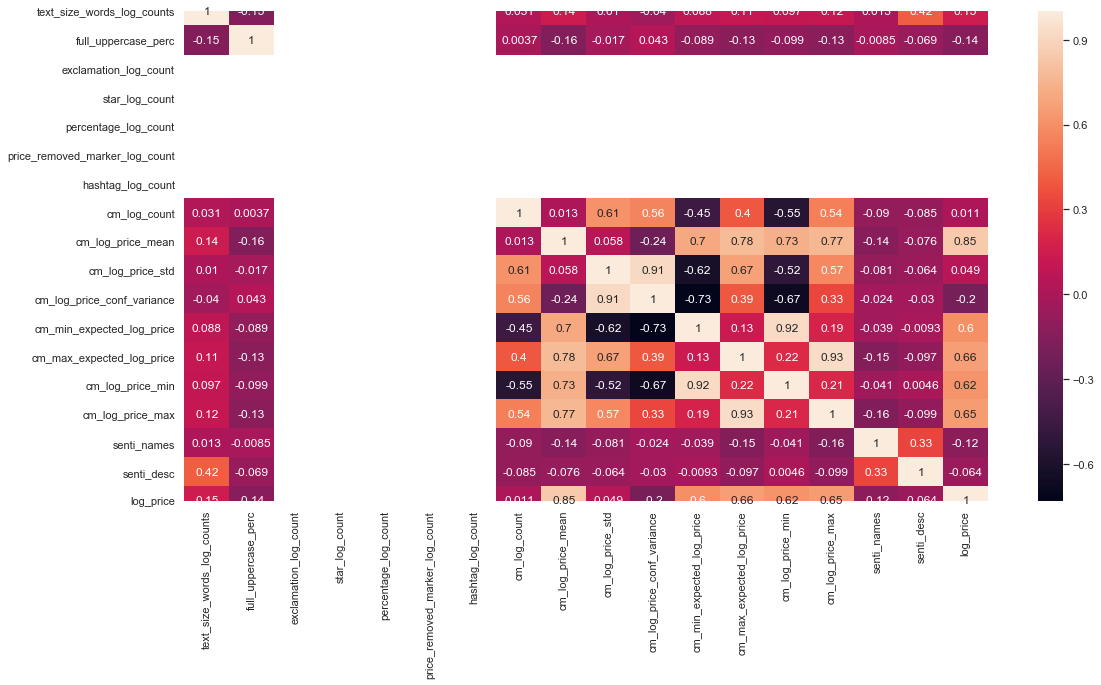

In [77]:
#ref = https://datatofish.com/correlation-matrix-pandas/
corrMatrix  = df_corr.corr()

plt.figure(figsize = (18,9))
sns.heatmap(corrMatrix, annot=True)
plt.show()

##### Plot summary - We can see that features - [cm_log_price_mean, cm_min_expected_log_price,cm_max_expected_log_price, cm_log_price_min, cm_log_price_max] are the only 5 features having correlation of >0.5 with log_price output variable. Hence in our ML models, we can choose to keep only these 3 newly generated features out of all the 17 that we generated

In [78]:
# ref - https://stackoverflow.com/questions/50250432/python-lightgbm-text-classicication-with-tfidf
'''
This code concatenates all the features that we generated 
using scipy.sparse.hstack function and converts datatype 
into 'float32' format so as to feed into Machine Learning models
'''


X_train = scipy.sparse.hstack((train_bow_product_name,train_bow_desc,train_bow_product_information,
                               train_manufacturer,train_category,train_subcategory
                              )).tocsr().astype('float32')

X_test = scipy.sparse.hstack((test_bow_product_name,test_bow_desc,test_bow_product_information,
                               test_manufacturer,test_category,test_subcategory
                              )).tocsr().astype('float32')


         
         

y_train  = df_train['log_price']

y_test = df_test['log_price']
y_test = y_test[:]

print("X_train Shape is ",X_train.shape)
print("X_test Shape is ",X_test.shape)
print("y_train Shape is ",y_train.shape)
print("y_test Shape is ",y_test.shape)


X_train Shape is  (8056, 8528)
X_test Shape is  (896, 8528)
y_train Shape is  (8056,)
y_test Shape is  (896,)


#  <a id = 'section7'> <font color='red'>  6. Evaluation Metrics  </font> </a>

In [79]:
'''
This code creates the RMSLE scorer function
which would be used as Evalation metric for ML models
'''



def rmsle_score(y,y_pred):
    return math.sqrt(mean_squared_error(y, y_pred))


def rmsle_lgb(labels, preds):
    return 'rmsle', rmsle_score(preds, labels), False

# Function for RMSE - (Root mean Square error)
def rmse_score(y,y_pred):
    return math.sqrt(mean_squared_error(y, y_pred))

#  <a id = 'section8'> <font color='red'>  7. Baseline Ridge Model  </font> </a>

### <font color='red'> 7.1 Using Existing Hyperparameters </font>

In [80]:
ridge_model = Ridge(solver = "lsqr", fit_intercept=False)
ridge_model.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='lsqr', tol=0.001)

In [81]:
preds = ridge_model.predict(X_test)

print('Train RMSLE = ',rmsle_score(y_train , ridge_model.predict(X_train)))
print('Test RMSLE = ',rmsle_score(y_test , preds),'\n')


Train RMSLE =  0.3242892682702689
Test RMSLE =  0.6172278668686972 



### <font color='red'> 7.2 Tune Hyperparameters </font>

In [82]:
'''
Code for Hyperparameter Search using GridSearchCV function
'''

'\nCode for Hyperparameter Search using GridSearchCV function\n'

In [83]:
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000,10000],
              'fit_intercept' : [False],
              'solver' : ['lsqr']}

gs_ridge = GridSearchCV(estimator = Ridge(),
                        param_grid = parameters,
                        cv = 3, 
                        scoring = 'neg_mean_squared_error',
                        verbose = 100,
                        return_train_score = True,
                        n_jobs = -2)
gs_ridge.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
Memmapping (shape=(1924956,), dtype=int32) to new file C:\Users\User\AppData\Local\Temp\joblib_memmapping_folder_3924_6416618945\3924-2283019762432-cd7ae184b105422abb157711cd00c7d9.pkl
Pickling array (shape=(8057,), dtype=int32).
Memmapping (shape=(1924956,), dtype=float32) to new file C:\Users\User\AppData\Local\Temp\joblib_memmapping_folder_3924_6416618945\3924-2283019762432-d818031b89bc4d5ba9e3207d38c2c4e4.pkl
Pickling array (shape=(8056,), dtype=int64).
Pickling array (shape=(8056,), dtype=float32).
Pickling array (shape=(8056,), dtype=int64).
Pickling array (shape=(5370,), dtype=int32).
Pickling array (shape=(2686,), dtype=int32).
Memmapping (shape=(1924956,), dtype=int32) to old file C:\Users\User\AppData\Local\Temp\joblib_memmapping_folder_3924_6416618945\3924-2283019762432-cd7ae184b105422abb157711cd00c7d9.pkl
Pickling array (shape=(8057,), dtyp

Memmapping (shape=(1924956,), dtype=int32) to old file C:\Users\User\AppData\Local\Temp\joblib_memmapping_folder_3924_6416618945\3924-2283019762432-cd7ae184b105422abb157711cd00c7d9.pkl
Pickling array (shape=(8057,), dtype=int32).
Memmapping (shape=(1924956,), dtype=float32) to old file C:\Users\User\AppData\Local\Temp\joblib_memmapping_folder_3924_6416618945\3924-2283019762432-d818031b89bc4d5ba9e3207d38c2c4e4.pkl
Pickling array (shape=(8056,), dtype=int64).
Pickling array (shape=(8056,), dtype=float32).
Pickling array (shape=(8056,), dtype=int64).
Pickling array (shape=(5370,), dtype=int32).
Pickling array (shape=(2686,), dtype=int32).
Memmapping (shape=(1924956,), dtype=int32) to old file C:\Users\User\AppData\Local\Temp\joblib_memmapping_folder_3924_6416618945\3924-2283019762432-cd7ae184b105422abb157711cd00c7d9.pkl
Pickling array (shape=(8057,), dtype=int32).
Memmapping (shape=(1924956,), dtype=float32) to old file C:\Users\User\AppData\Local\Temp\joblib_memmapping_folder_3924_641661

Pickling array (shape=(8056,), dtype=int64).
Pickling array (shape=(8056,), dtype=float32).
Pickling array (shape=(8056,), dtype=int64).
Pickling array (shape=(5371,), dtype=int32).
Pickling array (shape=(2685,), dtype=int32).
[Parallel(n_jobs=-2)]: Done  17 out of  27 | elapsed:    7.9s remaining:    4.6s
Memmapping (shape=(1924956,), dtype=int32) to old file C:\Users\User\AppData\Local\Temp\joblib_memmapping_folder_3924_6416618945\3924-2283019762432-cd7ae184b105422abb157711cd00c7d9.pkl
Pickling array (shape=(8057,), dtype=int32).
Memmapping (shape=(1924956,), dtype=float32) to old file C:\Users\User\AppData\Local\Temp\joblib_memmapping_folder_3924_6416618945\3924-2283019762432-d818031b89bc4d5ba9e3207d38c2c4e4.pkl
Pickling array (shape=(8056,), dtype=int64).
Pickling array (shape=(8056,), dtype=float32).
Pickling array (shape=(8056,), dtype=int64).
Pickling array (shape=(5370,), dtype=int32).
Pickling array (shape=(2686,), dtype=int32).
[Parallel(n_jobs=-2)]: Done  18 out of  27 | ela

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=-2,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'fit_intercept': [False], 'solver': ['lsqr']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=100)

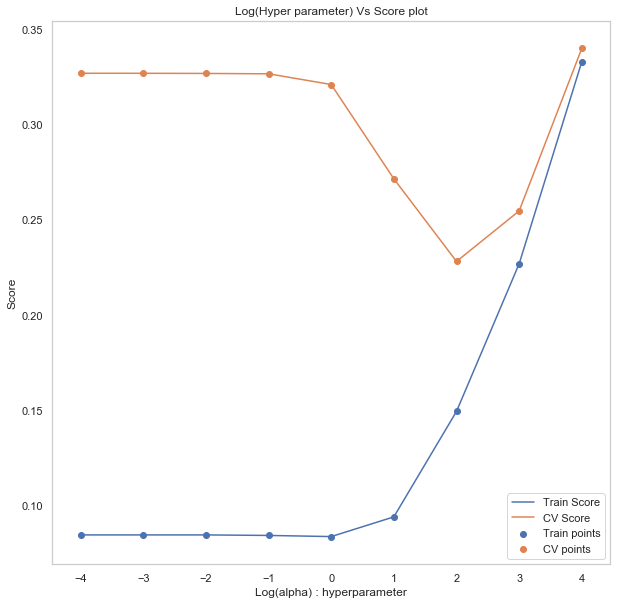

Best Estimator  Ridge(alpha=100, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='lsqr', tol=0.001)


In [84]:
results = pd.DataFrame.from_dict(gs_ridge.cv_results_)
results = results.sort_values(['param_alpha'])

train_score = results['mean_train_score']*-1
cv_score = results['mean_test_score'] *-1
hyp =  results['param_alpha']

fig = plt.figure(figsize = (10,10))
#ax = fig.gca()
plt.plot(np.log10(list(hyp.values)), train_score, label='Train Score')
plt.plot(np.log10(list(hyp.values)), cv_score, label='CV Score')

plt.scatter(np.log10(list(hyp.values)), train_score, label='Train points')
plt.scatter(np.log10(list(hyp.values)), cv_score, label='CV points')

plt.legend()
plt.xlabel("Log(alpha) : hyperparameter")
plt.ylabel("Score")
plt.title("Log(Hyper parameter) Vs Score plot")
plt.grid()
plt.show()

print("Best Estimator ",gs_ridge.best_estimator_)
#results

##### Plot Summary - As we can see from the Hyperparameter(alpha) vs score graph, alpha = 100 gave the lowest Cross Validation score, Hence we can use this value for our model, Re-training model using alpha = 100

### <font color='red'> 7.3 Re-train Model with Best Hyperparameters </font>

In [85]:
ridge_model = Ridge(solver = "lsqr", fit_intercept=False,alpha = 10)
ridge_model.fit(X_train, y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='lsqr', tol=0.001)

In [86]:
preds = ridge_model.predict(X_test)
print('Train RMSLE = ',rmsle_score(y_train , ridge_model.predict(X_train)))
print('Test RMSLE = ',rmsle_score(y_test , preds),'\n')


Train RMSLE =  0.3427025702705984
Test RMSLE =  0.5209536191006 



##### Summary - Only slight improvement observed from 0.474 to 0.472 in Test RMSLE after hyperparameter tuning, Model still overfitting but can be corrected later using Ensembling of different Models

#  <a id = 'section9'> <font color='red'>  9. Baseline LGBM Model  </font> </a>

In [87]:
lgbm_params = {'n_estimators': 900, 'learning_rate': 0.15, 'max_depth': 5,
               'num_leaves': 31, 'subsample': 0.9, 'colsample_bytree': 0.8,
               'min_child_samples': 50, 'n_jobs': -2}


lgbm_model = lgb.LGBMRegressor(**lgbm_params)
#lgbm_model.fit(X_train,y_train)

lgbm_model.fit(X_train, y_train,
         eval_set=[(X_test, y_test)],
         eval_metric=rmsle_lgb,
         early_stopping_rounds=None,
         verbose=True)

[1]	valid_0's l2: 0.423393	valid_0's rmsle: 0.650686
[2]	valid_0's l2: 0.390228	valid_0's rmsle: 0.624682
[3]	valid_0's l2: 0.363369	valid_0's rmsle: 0.602801
[4]	valid_0's l2: 0.343399	valid_0's rmsle: 0.586003
[5]	valid_0's l2: 0.327713	valid_0's rmsle: 0.572462
[6]	valid_0's l2: 0.315509	valid_0's rmsle: 0.561702
[7]	valid_0's l2: 0.306387	valid_0's rmsle: 0.553522
[8]	valid_0's l2: 0.300419	valid_0's rmsle: 0.548105
[9]	valid_0's l2: 0.294446	valid_0's rmsle: 0.542628
[10]	valid_0's l2: 0.288252	valid_0's rmsle: 0.536891
[11]	valid_0's l2: 0.285253	valid_0's rmsle: 0.534091
[12]	valid_0's l2: 0.279835	valid_0's rmsle: 0.528994
[13]	valid_0's l2: 0.276828	valid_0's rmsle: 0.526144
[14]	valid_0's l2: 0.273258	valid_0's rmsle: 0.522741
[15]	valid_0's l2: 0.270948	valid_0's rmsle: 0.520527
[16]	valid_0's l2: 0.268106	valid_0's rmsle: 0.51779
[17]	valid_0's l2: 0.265069	valid_0's rmsle: 0.514849
[18]	valid_0's l2: 0.263758	valid_0's rmsle: 0.513574
[19]	valid_0's l2: 0.263561	valid_0's 

[152]	valid_0's l2: 0.217296	valid_0's rmsle: 0.46615
[153]	valid_0's l2: 0.21719	valid_0's rmsle: 0.466037
[154]	valid_0's l2: 0.216991	valid_0's rmsle: 0.465823
[155]	valid_0's l2: 0.216754	valid_0's rmsle: 0.465569
[156]	valid_0's l2: 0.21662	valid_0's rmsle: 0.465425
[157]	valid_0's l2: 0.216418	valid_0's rmsle: 0.465208
[158]	valid_0's l2: 0.216187	valid_0's rmsle: 0.46496
[159]	valid_0's l2: 0.216214	valid_0's rmsle: 0.464988
[160]	valid_0's l2: 0.216035	valid_0's rmsle: 0.464796
[161]	valid_0's l2: 0.21626	valid_0's rmsle: 0.465037
[162]	valid_0's l2: 0.216123	valid_0's rmsle: 0.464891
[163]	valid_0's l2: 0.215922	valid_0's rmsle: 0.464674
[164]	valid_0's l2: 0.21568	valid_0's rmsle: 0.464413
[165]	valid_0's l2: 0.215386	valid_0's rmsle: 0.464097
[166]	valid_0's l2: 0.215706	valid_0's rmsle: 0.464442
[167]	valid_0's l2: 0.215621	valid_0's rmsle: 0.46435
[168]	valid_0's l2: 0.215545	valid_0's rmsle: 0.464268
[169]	valid_0's l2: 0.215488	valid_0's rmsle: 0.464207
[170]	valid_0's l

[301]	valid_0's l2: 0.208628	valid_0's rmsle: 0.456758
[302]	valid_0's l2: 0.208669	valid_0's rmsle: 0.456803
[303]	valid_0's l2: 0.208739	valid_0's rmsle: 0.45688
[304]	valid_0's l2: 0.208638	valid_0's rmsle: 0.45677
[305]	valid_0's l2: 0.208573	valid_0's rmsle: 0.456698
[306]	valid_0's l2: 0.208595	valid_0's rmsle: 0.456723
[307]	valid_0's l2: 0.208464	valid_0's rmsle: 0.456579
[308]	valid_0's l2: 0.208223	valid_0's rmsle: 0.456315
[309]	valid_0's l2: 0.208232	valid_0's rmsle: 0.456325
[310]	valid_0's l2: 0.208241	valid_0's rmsle: 0.456334
[311]	valid_0's l2: 0.208281	valid_0's rmsle: 0.456378
[312]	valid_0's l2: 0.208439	valid_0's rmsle: 0.456551
[313]	valid_0's l2: 0.208414	valid_0's rmsle: 0.456523
[314]	valid_0's l2: 0.208441	valid_0's rmsle: 0.456553
[315]	valid_0's l2: 0.208347	valid_0's rmsle: 0.45645
[316]	valid_0's l2: 0.208363	valid_0's rmsle: 0.456468
[317]	valid_0's l2: 0.208092	valid_0's rmsle: 0.456171
[318]	valid_0's l2: 0.208132	valid_0's rmsle: 0.456214
[319]	valid_0

[450]	valid_0's l2: 0.204571	valid_0's rmsle: 0.452295
[451]	valid_0's l2: 0.204534	valid_0's rmsle: 0.452254
[452]	valid_0's l2: 0.204366	valid_0's rmsle: 0.452069
[453]	valid_0's l2: 0.204407	valid_0's rmsle: 0.452114
[454]	valid_0's l2: 0.204452	valid_0's rmsle: 0.452164
[455]	valid_0's l2: 0.20445	valid_0's rmsle: 0.452162
[456]	valid_0's l2: 0.204558	valid_0's rmsle: 0.452281
[457]	valid_0's l2: 0.204578	valid_0's rmsle: 0.452303
[458]	valid_0's l2: 0.20453	valid_0's rmsle: 0.45225
[459]	valid_0's l2: 0.204497	valid_0's rmsle: 0.452213
[460]	valid_0's l2: 0.204502	valid_0's rmsle: 0.452219
[461]	valid_0's l2: 0.204538	valid_0's rmsle: 0.452258
[462]	valid_0's l2: 0.204381	valid_0's rmsle: 0.452085
[463]	valid_0's l2: 0.20421	valid_0's rmsle: 0.451896
[464]	valid_0's l2: 0.204246	valid_0's rmsle: 0.451936
[465]	valid_0's l2: 0.204171	valid_0's rmsle: 0.451853
[466]	valid_0's l2: 0.204171	valid_0's rmsle: 0.451852
[467]	valid_0's l2: 0.204167	valid_0's rmsle: 0.451848
[468]	valid_0'

[599]	valid_0's l2: 0.202049	valid_0's rmsle: 0.449499
[600]	valid_0's l2: 0.202074	valid_0's rmsle: 0.449526
[601]	valid_0's l2: 0.202035	valid_0's rmsle: 0.449484
[602]	valid_0's l2: 0.202029	valid_0's rmsle: 0.449476
[603]	valid_0's l2: 0.202018	valid_0's rmsle: 0.449464
[604]	valid_0's l2: 0.202167	valid_0's rmsle: 0.449629
[605]	valid_0's l2: 0.202266	valid_0's rmsle: 0.44974
[606]	valid_0's l2: 0.202241	valid_0's rmsle: 0.449713
[607]	valid_0's l2: 0.202102	valid_0's rmsle: 0.449557
[608]	valid_0's l2: 0.202135	valid_0's rmsle: 0.449594
[609]	valid_0's l2: 0.202063	valid_0's rmsle: 0.449514
[610]	valid_0's l2: 0.202074	valid_0's rmsle: 0.449526
[611]	valid_0's l2: 0.201967	valid_0's rmsle: 0.449408
[612]	valid_0's l2: 0.201933	valid_0's rmsle: 0.449369
[613]	valid_0's l2: 0.201968	valid_0's rmsle: 0.449408
[614]	valid_0's l2: 0.202109	valid_0's rmsle: 0.449565
[615]	valid_0's l2: 0.20208	valid_0's rmsle: 0.449534
[616]	valid_0's l2: 0.201977	valid_0's rmsle: 0.449419
[617]	valid_

[748]	valid_0's l2: 0.200968	valid_0's rmsle: 0.448295
[749]	valid_0's l2: 0.200989	valid_0's rmsle: 0.448318
[750]	valid_0's l2: 0.201004	valid_0's rmsle: 0.448334
[751]	valid_0's l2: 0.201014	valid_0's rmsle: 0.448346
[752]	valid_0's l2: 0.200972	valid_0's rmsle: 0.448299
[753]	valid_0's l2: 0.201091	valid_0's rmsle: 0.448432
[754]	valid_0's l2: 0.201234	valid_0's rmsle: 0.448591
[755]	valid_0's l2: 0.201159	valid_0's rmsle: 0.448507
[756]	valid_0's l2: 0.2012	valid_0's rmsle: 0.448553
[757]	valid_0's l2: 0.201178	valid_0's rmsle: 0.448528
[758]	valid_0's l2: 0.201187	valid_0's rmsle: 0.448538
[759]	valid_0's l2: 0.201151	valid_0's rmsle: 0.448499
[760]	valid_0's l2: 0.201059	valid_0's rmsle: 0.448396
[761]	valid_0's l2: 0.201012	valid_0's rmsle: 0.448344
[762]	valid_0's l2: 0.200989	valid_0's rmsle: 0.448318
[763]	valid_0's l2: 0.201053	valid_0's rmsle: 0.448389
[764]	valid_0's l2: 0.201053	valid_0's rmsle: 0.448389
[765]	valid_0's l2: 0.201003	valid_0's rmsle: 0.448334
[766]	valid_

[897]	valid_0's l2: 0.200415	valid_0's rmsle: 0.447678
[898]	valid_0's l2: 0.20048	valid_0's rmsle: 0.447749
[899]	valid_0's l2: 0.20051	valid_0's rmsle: 0.447783
[900]	valid_0's l2: 0.200577	valid_0's rmsle: 0.447858


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=0.8,
       importance_type='split', learning_rate=0.15, max_depth=5,
       min_child_samples=50, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=900, n_jobs=-2, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=0.9, subsample_for_bin=200000, subsample_freq=0)

In [88]:
preds = lgbm_model.predict(X_test)
print('Train RMSLE = ',rmsle_score(y_train , lgbm_model.predict(X_train)))
print('Test RMSLE = ',rmsle_score(y_test , preds),'\n')

Train RMSLE =  0.3327685596366166
Test RMSLE =  0.44785787555847956 



##### Summary - This performs better than Ridge Model, we will have to tune the hyperparameters to improve the model

### <font color='red'> 9.1 Tuning hyperparameters to Improve model </font>

'''
Increasing Num Estimators from 900 to 1500
Decreasing learning rate from 0.15 to 0.05
Removing Max Depth limitation from 5 to None
Increasing Num Leaves from 31 to 50 
Using N Jobs = -1 for faster parallelization
'''

In [89]:
lgbm_params = {'n_estimators': 1500, 'learning_rate': 0.05, 'max_depth': -1,
               'num_leaves': 50, 'subsample': 0.8, 'colsample_bytree': 0.8,
               'min_child_samples': 50, 'n_jobs': -1}


lgbm_model = lgb.LGBMRegressor(**lgbm_params)
#lgbm_model.fit(X_train,y_train)

lgbm_model.fit(X_train, y_train,
         eval_set=[(X_test, y_test)],
         eval_metric=rmsle_lgb,
         early_stopping_rounds=100,
         verbose=True)

[1]	valid_0's l2: 0.450071	valid_0's rmsle: 0.670873
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l2: 0.431952	valid_0's rmsle: 0.65723
[3]	valid_0's l2: 0.415585	valid_0's rmsle: 0.644659
[4]	valid_0's l2: 0.40058	valid_0's rmsle: 0.632914
[5]	valid_0's l2: 0.386947	valid_0's rmsle: 0.622051
[6]	valid_0's l2: 0.374204	valid_0's rmsle: 0.611722
[7]	valid_0's l2: 0.362799	valid_0's rmsle: 0.602328
[8]	valid_0's l2: 0.35252	valid_0's rmsle: 0.593734
[9]	valid_0's l2: 0.342968	valid_0's rmsle: 0.585635
[10]	valid_0's l2: 0.334149	valid_0's rmsle: 0.578057
[11]	valid_0's l2: 0.32606	valid_0's rmsle: 0.571016
[12]	valid_0's l2: 0.317972	valid_0's rmsle: 0.56389
[13]	valid_0's l2: 0.311456	valid_0's rmsle: 0.558082
[14]	valid_0's l2: 0.305579	valid_0's rmsle: 0.552792
[15]	valid_0's l2: 0.300359	valid_0's rmsle: 0.54805
[16]	valid_0's l2: 0.29466	valid_0's rmsle: 0.542826
[17]	valid_0's l2: 0.290096	valid_0's rmsle: 0.538606
[18]	valid_0's l2: 0.286003	valid_0'

[151]	valid_0's l2: 0.200692	valid_0's rmsle: 0.447987
[152]	valid_0's l2: 0.200644	valid_0's rmsle: 0.447933
[153]	valid_0's l2: 0.200583	valid_0's rmsle: 0.447865
[154]	valid_0's l2: 0.200548	valid_0's rmsle: 0.447826
[155]	valid_0's l2: 0.200591	valid_0's rmsle: 0.447874
[156]	valid_0's l2: 0.20046	valid_0's rmsle: 0.447728
[157]	valid_0's l2: 0.20029	valid_0's rmsle: 0.447537
[158]	valid_0's l2: 0.200094	valid_0's rmsle: 0.447319
[159]	valid_0's l2: 0.200087	valid_0's rmsle: 0.447311
[160]	valid_0's l2: 0.200113	valid_0's rmsle: 0.44734
[161]	valid_0's l2: 0.200077	valid_0's rmsle: 0.447299
[162]	valid_0's l2: 0.199971	valid_0's rmsle: 0.447182
[163]	valid_0's l2: 0.199961	valid_0's rmsle: 0.44717
[164]	valid_0's l2: 0.19975	valid_0's rmsle: 0.446934
[165]	valid_0's l2: 0.199796	valid_0's rmsle: 0.446985
[166]	valid_0's l2: 0.199557	valid_0's rmsle: 0.446718
[167]	valid_0's l2: 0.199559	valid_0's rmsle: 0.44672
[168]	valid_0's l2: 0.199466	valid_0's rmsle: 0.446617
[169]	valid_0's 

[300]	valid_0's l2: 0.193839	valid_0's rmsle: 0.440271
[301]	valid_0's l2: 0.193868	valid_0's rmsle: 0.440304
[302]	valid_0's l2: 0.193848	valid_0's rmsle: 0.440282
[303]	valid_0's l2: 0.193744	valid_0's rmsle: 0.440164
[304]	valid_0's l2: 0.193585	valid_0's rmsle: 0.439982
[305]	valid_0's l2: 0.193619	valid_0's rmsle: 0.440022
[306]	valid_0's l2: 0.193534	valid_0's rmsle: 0.439925
[307]	valid_0's l2: 0.193575	valid_0's rmsle: 0.439972
[308]	valid_0's l2: 0.19369	valid_0's rmsle: 0.440102
[309]	valid_0's l2: 0.193629	valid_0's rmsle: 0.440033
[310]	valid_0's l2: 0.193632	valid_0's rmsle: 0.440036
[311]	valid_0's l2: 0.193627	valid_0's rmsle: 0.44003
[312]	valid_0's l2: 0.193422	valid_0's rmsle: 0.439798
[313]	valid_0's l2: 0.193431	valid_0's rmsle: 0.439808
[314]	valid_0's l2: 0.193461	valid_0's rmsle: 0.439842
[315]	valid_0's l2: 0.193395	valid_0's rmsle: 0.439767
[316]	valid_0's l2: 0.193413	valid_0's rmsle: 0.439788
[317]	valid_0's l2: 0.193608	valid_0's rmsle: 0.440009
[318]	valid_

[449]	valid_0's l2: 0.193597	valid_0's rmsle: 0.439996
[450]	valid_0's l2: 0.193598	valid_0's rmsle: 0.439997
[451]	valid_0's l2: 0.193607	valid_0's rmsle: 0.440008
[452]	valid_0's l2: 0.193561	valid_0's rmsle: 0.439956
[453]	valid_0's l2: 0.193581	valid_0's rmsle: 0.439978
[454]	valid_0's l2: 0.193569	valid_0's rmsle: 0.439965
[455]	valid_0's l2: 0.193591	valid_0's rmsle: 0.43999
[456]	valid_0's l2: 0.193558	valid_0's rmsle: 0.439953
[457]	valid_0's l2: 0.19369	valid_0's rmsle: 0.440102
[458]	valid_0's l2: 0.193671	valid_0's rmsle: 0.440081
[459]	valid_0's l2: 0.193618	valid_0's rmsle: 0.440021
[460]	valid_0's l2: 0.193626	valid_0's rmsle: 0.440029
[461]	valid_0's l2: 0.193626	valid_0's rmsle: 0.44003
[462]	valid_0's l2: 0.193715	valid_0's rmsle: 0.440131
[463]	valid_0's l2: 0.193682	valid_0's rmsle: 0.440094
[464]	valid_0's l2: 0.19376	valid_0's rmsle: 0.440182
[465]	valid_0's l2: 0.193723	valid_0's rmsle: 0.44014
[466]	valid_0's l2: 0.193758	valid_0's rmsle: 0.440179
[467]	valid_0's

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=0.8,
       importance_type='split', learning_rate=0.05, max_depth=-1,
       min_child_samples=50, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=1500, n_jobs=-1, num_leaves=50, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=0.8, subsample_for_bin=200000, subsample_freq=0)

In [90]:
preds = lgbm_model.predict(X_test)
print('Train RMSLE = ',rmsle_score(y_train , lgbm_model.predict(X_train)))
print('Test RMSLE = ',rmsle_score(y_test , preds))

Train RMSLE =  0.29678320475412373
Test RMSLE =  0.4396058264195415


##### Summary - Test RMSLE improved from 0.5 to 0.47 (significant improvement)

### <font color='red'> Baseline (Ridge + LGBM) Ensemble  </font>

#### <font color='red'> 10.1 Build Custom Ensemble Mode </font>

In [91]:
'''
This code takes the predictions from LGBM and Ridge 
and generates a weighted Prediction : (preds = w1*preds_ridge + w2*preds_lgbm),
weights - w1 and w2 where w2 = (1- w1) are found out using cross validation 
that gives lowest RMSLE score
'''

'\nThis code takes the predictions from LGBM and Ridge \nand generates a weighted Prediction : (preds = w1*preds_ridge + w2*preds_lgbm),\nweights - w1 and w2 where w2 = (1- w1) are found out using cross validation \nthat gives lowest RMSLE score\n'

In [92]:
preds_ridge = np.expm1(ridge_model.predict(X_test))
preds_lgbm = np.expm1(lgbm_model.predict(X_test))

In [93]:
# Defining the weights to test on
weights = list(np.linspace(0.1,1,50))
scores = []

In [94]:
for w in tqdm_notebook(weights):
    preds = (w*preds_ridge) + (1-w)*(preds_lgbm)
    scores.append(rmsle_score(y_test,np.log1p(preds)))

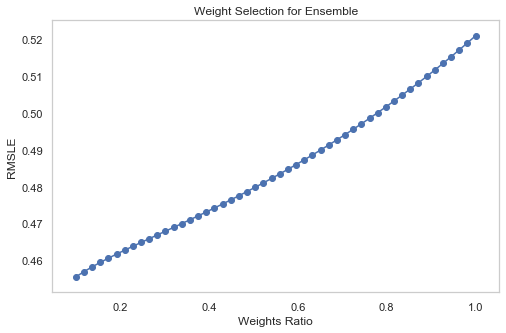

In [95]:
fig = plt.figure(figsize = (8,5))
plt.plot(weights, scores)
plt.scatter(weights, scores)
plt.xlabel("Weights Ratio")
plt.ylabel("RMSLE")
plt.title("Weight Selection for Ensemble")
plt.grid()
plt.show()

##### Summary - As we can see from the weights (vs) RMSLE score graph, weight ratio of ~0.5 gives lowest RMSLE, We can use these weights for predictions

In [96]:
# Dataframe containing weights (vs) scores
df_ens = pd.DataFrame({'weights' : weights,'scores':scores})
df_ens.head(5)

,weights,scores
0,0.100000,0.455556
1,0.118367,0.456976
2,0.136735,0.458277
3,0.155102,0.459490
4,0.173469,0.460641


In [97]:
w = df_ens.weights[df_ens.scores == min(df_ens.scores)].values[0]
preds = (w*preds_ridge) + (1-w)*(preds_lgbm)
print('Test RMSLE of Ensemble = ',rmsle_score(y_test , np.log1p(preds)))

Test RMSLE of Ensemble =  0.45555575565468515


#### Summary - Ensembling of LGBM (0.47 )and Ridge (0.47 ) gives RMSLE of 0.46 which is lower than individual models. So, our Ensembling was a success here.

In [98]:
# ref - https://www.kaggle.com/lopuhin/mercari-golf-0-3875-cv-in-75-loc-1900-s
'''
This Function concatenates text features from item-name,brand,category,description to create 
the concatenated text feature.
'''
print(df['manufacturer'].dtypes)

def data_preprocess(df):
    df['product_name'] = df['product_name'] + ' ' + df['manufacturer'].astype(str)
    df['text'] = (df['description'].fillna('') + ' ' + df['product_name'] + ' ' + df['category'].astype(str) + ' ' + df['product_information'])
    return df[['product_name', 'text', 'price']]

object


In [99]:
'''
This Function takes in train,test datasets as input and returns 
feature transforms - Tfidfvectorizer,Onehotencoder,etc. and 
returns concatenated feature (hstack) of X_train,X_test,y_train,y_test as output.
'''
def data_encoder(train,test):
    # Text Encoding for Names...
    vect_name = TfidfVectorizer(max_features=100000, token_pattern='\w+', dtype=np.float32)
    train_name  = vect_name.fit_transform(train['product_name'].values)
    test_name = vect_name.transform(test['product_name'].values)

    # Text Encoding for Text...
    vect_text = TfidfVectorizer(max_features=100000, token_pattern='\w+', ngram_range=(1, 2), dtype=np.float32)
    train_text  = vect_text.fit_transform(train['text'].values)
    test_text = vect_text.transform(test['text'].values)

    # Final Feature Stack for X_train,X_test
    X_train = scipy.sparse.hstack((train_name, train_text)).tocsr().astype('float32')
    X_test = scipy.sparse.hstack((test_name, test_text)).tocsr().astype('float32')

    # Final Outputs.. y_train,y_test (Standardizing the output variable price) using standardscaler...
    global y_scaler
    y_scaler = StandardScaler()
    y_train = y_scaler.fit_transform(np.log1p(train['price'].values.reshape(-1, 1)))
    y_test = y_scaler.transform(np.log1p(test['price'].values.reshape(-1, 1)))

    return X_train,X_test,y_train,y_test

In [100]:
X_train,X_test,y_train,y_test = data_encoder(data_preprocess(df_train),data_preprocess(df_test))
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


(8056, 112476) (896, 112476) (8056, 1) (896, 1)


In [101]:
'''Building a Sparse MLP model'''

def build_mlp_model(train):
    model_in = ks.Input(shape=(train.shape[1],), dtype='float32', sparse=True)
    out = ks.layers.Dense(256, activation='relu')(model_in)
    out = ks.layers.Dense(64, activation='relu')(out)
    out = ks.layers.Dense(64, activation='relu')(out)
    out = ks.layers.Dense(32, activation='relu')(out)
    out = ks.layers.Dense(1)(out)
    model = ks.Model(model_in, out)
    return model

In [102]:
'''Summarizing the model built'''

baseline_mlp_model = build_mlp_model(X_train)
baseline_mlp_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 112476)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               28794112  
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 28,816,833
Trainable params: 28,816,833
Non-trainable params: 0
________________________________________________________________

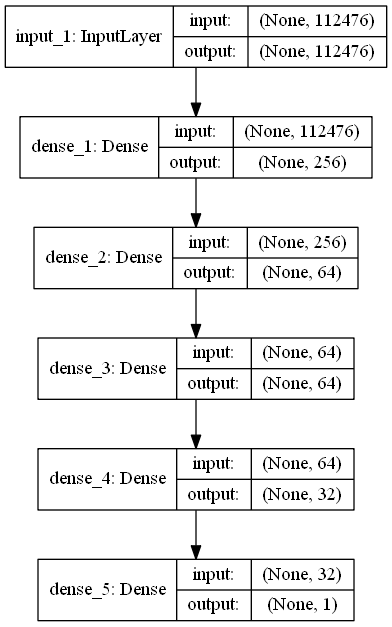

In [103]:
'''Graphical Visualization of the Model'''

plot_model(baseline_mlp_model, to_file='baseline_mlp_model.png', show_shapes=True, show_layer_names=True)
Image(filename='baseline_mlp_model.png')

In [104]:
# ref - https://www.kaggle.com/lopuhin/mercari-golf-0-3875-cv-in-75-loc-1900-s
'''This function builds a timer which prints time elapsed for a code section to execute'''

@contextmanager
def timer(name):
    t0 = time.time()
    yield
    print(f'[{name}] done in {time.time() - t0:.0f} s')

In [105]:
'''Training Model'''

baseline_mlp_model.compile(loss='mean_squared_error', optimizer=ks.optimizers.Adam(lr=3e-3))
filepath = "baseline_mlp_model_epochs.{epoch:03d}-val_loss.{val_loss:.3f}.hdf5"
checkpoint = ks.callbacks.ModelCheckpoint(filepath,monitor="val_loss",mode="min",save_best_only = True,verbose = 1)
tensorboard = ks.callbacks.TensorBoard(log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
callbacks_list = [checkpoint,tensorboard]

# Training 3 Models with incremental Batch Sizes of (256,512,1024,2049) for 1 epoch each..
for i in range(4):
    with timer(f'epoch {i + 1}'):
        baseline_mlp_model.fit(x=X_train, y=y_train, batch_size=2**(8 + i), epochs=1, verbose=1, validation_data=(X_test, y_test),callbacks = callbacks_list)
        # print('Test RMSLE after epoch = ',i,' is ',rmsle_score(np.expm1(y_test) , np.expm1(baseline_mlp_model.predict(X_test)[:, 0])),'\n')
    
        preds = baseline_mlp_model.predict(X_test)[:, 0]
        y_pred = y_scaler.inverse_transform(preds.reshape(-1, 1))[:, 0]
#         print('Test RMSLE for batch size = ',2**(8 + i),' is ',rmsle_score(y_test , y_pred),'\n')
        print('Test RMSLE for batch size = ',2**(8 + i),' is ',rmsle_score(np.log1p(df_test['price']) , y_pred),'\n') 

Train on 8056 samples, validate on 896 samples
Epoch 1/1
8056/8056 [==============================] - ETA: 32s - loss: 1.13 - ETA: 26s - loss: 1.03 - ETA: 21s - loss: 1.04 - ETA: 19s - loss: 1.01 - ETA: 18s - loss: 0.93 - ETA: 16s - loss: 0.91 - ETA: 15s - loss: 0.89 - ETA: 15s - loss: 0.87 - ETA: 14s - loss: 0.87 - ETA: 13s - loss: 0.83 - ETA: 12s - loss: 0.81 - ETA: 11s - loss: 0.79 - ETA: 11s - loss: 0.77 - ETA: 10s - loss: 0.75 - ETA: 9s - loss: 0.7399 - ETA: 9s - loss: 0.725 - ETA: 8s - loss: 0.713 - ETA: 8s - loss: 0.702 - ETA: 7s - loss: 0.691 - ETA: 6s - loss: 0.678 - ETA: 6s - loss: 0.669 - ETA: 5s - loss: 0.660 - ETA: 4s - loss: 0.651 - ETA: 4s - loss: 0.646 - ETA: 3s - loss: 0.636 - ETA: 3s - loss: 0.631 - ETA: 2s - loss: 0.621 - ETA: 1s - loss: 0.612 - ETA: 1s - loss: 0.605 - ETA: 0s - loss: 0.599 - ETA: 0s - loss: 0.593 - 19s 2ms/step - loss: 0.5906 - val_loss: 0.4147

Epoch 00001: val_loss improved from inf to 0.41467, saving model to baseline_mlp_model_epochs.001-val_los

In [107]:
best_model = load_model('baseline_mlp_model_epochs.001-val_loss.0.381.hdf5')

preds = best_model.predict(X_test)[:, 0]
y_pred = y_scaler.inverse_transform(preds.reshape(-1, 1))[:, 0]

print('RMSLE of Test set is ',rmsle_score(np.log1p(df_test['price']) , y_pred))

RMSLE of Test set is  0.42717577546333335


#  <a id = 'section14'> <font color='red'>  11. Final Summary  </font> </a>

### <font color='red'> 11.1 PrettyTable Summary of all Models </font>

In [108]:
x = PrettyTable()
x.field_names = ["Model","Featurizations","Hyperparameters","Test RMSLE"]

x.add_row(["Baseline Ridge","BOW","alpha=10", 0.469])
x.add_row(["","","",""])
x.add_row(["Baseline LGBM","BOW","nest=1500,lr=0.05,leaves=50", 0.425])
x.add_row(["","","",""])
x.add_row(["Baseline Ensemble=(50% Ridge + 50% LGBM)","BOW","--",  0.423])
x.add_row(["","","",""])
x.add_row(["Baseline MLP","Concatenate Text, OHE", "batch = 1024",0.408])

x.add_row(["----------------","---------------", "---------------","------"])

x.add_row(["Final Model - MLP","","" ,"**0.408**"])

print(x)

+------------------------------------------+-----------------------+-----------------------------+------------+
|                  Model                   |     Featurizations    |       Hyperparameters       | Test RMSLE |
+------------------------------------------+-----------------------+-----------------------------+------------+
|              Baseline Ridge              |          BOW          |           alpha=10          |   0.469    |
|                                          |                       |                             |            |
|              Baseline LGBM               |          BOW          | nest=1500,lr=0.05,leaves=50 |   0.425    |
|                                          |                       |                             |            |
| Baseline Ensemble=(50% Ridge + 50% LGBM) |          BOW          |              --             |   0.423    |
|                                          |                       |                             |      

### <font color='red'> 11.2 Error Analysis of final Model </font>

In [109]:
'''
This Code analyzes how the errors between Predicted and Actual are Distributed
'''

'\nThis Code analyzes how the errors between Predicted and Actual are Distributed\n'

In [110]:
df_errs = pd.DataFrame({'predicted' : preds,'actual' : df_test['price']})
df_errs['error'] = df_errs['predicted'] - df_errs['actual']

In [111]:
# Creating Error Buckets with 5 units difference within (-20,+20) and others..

df_errs['error_slabs'] = pd.cut(df_errs.error, [-20,-15,-10,-5,0,5,10,15,20], include_lowest=True)
df_errs['error_slabs'] = df_errs['error_slabs'].astype(str)
df_errs['error_slabs'][(df_errs['error'] < -20) & (df_errs.error_slabs == 'nan')] = '< -20'
df_errs['error_slabs'][(df_errs['error'] > 20) & (df_errs.error_slabs == 'nan')] = '> 20'
df_errs['abs_error'] = abs(df_errs['error'])
df_errs = df_errs.sort_values(by = 'abs_error',ascending = True).reset_index(drop = True)
df_errs.head(5)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,predicted,actual,error,error_slabs,abs_error
0,-0.197039,0.89,-1.087039,"(-5.0, 0.0]",1.087039
1,-0.838068,0.29,-1.128068,"(-5.0, 0.0]",1.128068
2,-0.394913,1.25,-1.644913,"(-5.0, 0.0]",1.644913
3,-0.231607,1.50,-1.731607,"(-5.0, 0.0]",1.731607
4,-0.336201,1.46,-1.796201,"(-5.0, 0.0]",1.796201


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


Text(0.5, 1.0, 'Distribution of Log (Abs Errors)')

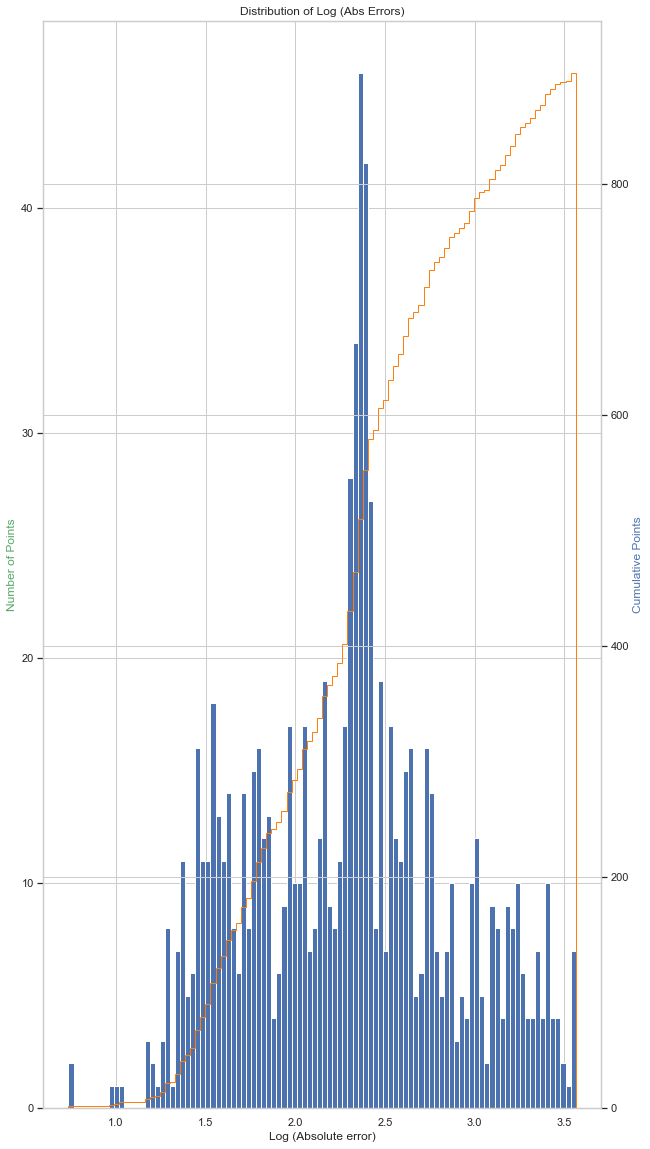

In [112]:
# Plotting Graph for Distribution of Log(Absolute Error) - PDF and CDF...

series = pd.Series(np.log1p(df_errs.abs_error))
fig, ax = plt.subplots()
ax2 = ax.twinx()
n, bins, patches = ax.hist(series, bins=100, normed=False)
n, bins, patches = ax2.hist(series, cumulative=1, histtype='step', bins=100, color='tab:orange')
ax.set_xlabel('Log (Absolute error)')
ax.set_ylabel('Number of Points', color='g')
ax2.set_ylabel('Cumulative Points', color='b')
plt.title('Distribution of Log (Abs Errors)')

##### Summary - As we can see, Nearly 99% data points have Log(Absolute Error) < 4 in Test Data. The blue curve shows the PDF distribution of Log(Abs error) and yellow curve shows the CDF distribution of Log(Abs error)

In [113]:
# ref - https://stackoverflow.com/questions/13838405/custom-sorting-in-pandas-dataframe
# ref - https://stackoverflow.com/questions/43251277/sort-bins-from-pandas-cut
'''Code for Grouping Error Slabs'''

tmp_df = pd.DataFrame(df_errs.groupby('error_slabs').agg('size').reset_index())
tmp_df.columns = ['error_slabs','count']
tmp_df['error_slabs'] = pd.Categorical(tmp_df['error_slabs'], 
                                       ["< -20", "(-20.001, -15.0]", "(-15.0, -10.0]","(-10.0, -5.0]",
                                        "(-5.0, 0.0]","(0.0, 5.0]","(5.0, 10.0]","(10.0, 15.0]",
                                        "(15.0, 20.0]","> 20"])
tmp_df = tmp_df.sort_values(by=['error_slabs'],ascending = True).reset_index(drop = True)
tmp_df['percent'] = round(tmp_df['count']/sum(tmp_df['count']),4)*100
tmp_df

,error_slabs,count,percent
0,< -20,103,11.50
1,"(-20.001, -15.0]",67,7.48
2,"(-15.0, -10.0]",179,19.98
3,"(-10.0, -5.0]",341,38.06
4,"(-5.0, 0.0]",206,22.99


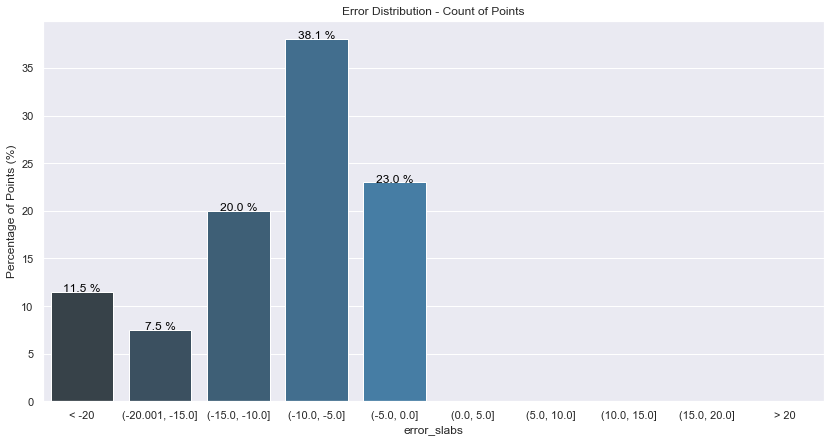

In [114]:
# Plotting Actual Errors Distribution by generating Histograms..

g = sns.set(rc={'figure.figsize':(14,7)})
g = sns.barplot(x = 'error_slabs',y = 'percent',data = tmp_df,palette="Blues_d")
plt.title('Error Distribution - Count of Points')
plt.ylabel('Percentage of Points (%)')

for index,row in tmp_df.iterrows():
    g.text(row.name,row.percent,str(round(row.percent,1)) + str(' %'), color='black', ha="center")
    
plt.show()

##### Plot Summary - As we can see, Nearly 55% of points have errors within (-5,+5) range. Nearly 75% points have errors within (-10,+10) range